<u><b>Desafio n° 1:</b></u>
<b>Analisis Exploratorio de Dataset de precios de propiedades</b>

<b>Grupo 4</b>

<b>Integrantes</b>
<ul>
<li>Angeli, Francesco</li>
<li>Brandan, Gabriel</li>
<li>Cubric, Walter</li>
<li>Giusti, Patricio Daniel</li>
<li>Morelli, Francisco</li>
<li>Sanchez, Hernán</li>
</ul>
<b>Imports</b>

In [182]:
#importamos pandas
import pandas as pd
#importamos numpy
import numpy as np
#importamos Expresiones Regulares
import re
#importamos Plotly
import plotly.express as px
#importamos Seaborn
import seaborn as sns

In [183]:
#importacion base de datos#
df = pd.read_csv("Data/properati.csv", sep=",")

#print tipo de datos
print(df.dtypes)

#ejemplo primeros tres
df.head(3)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [184]:
#revisamos los campos nulos en el dataframe
cant_nulos_por_campo = df.apply(lambda x: x.isnull().sum(), axis=0)
print(cant_nulos_por_campo)

#estimamos cuanto representa esa informacion faltante sobre el total de los datos que tenemos
cant_registros = df.shape[0]
print(cant_registros)


Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64
121220


In [185]:
#estimamos cuanto representa esa informacion faltante sobre el total de los datos que tenemos en %

porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
print(porc_nulos_por_campo)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [186]:
df["state_name"].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [187]:
pais = df
#generamos una nueva columna para realizar el conteo
pais['counter'] = 1
#generamos una lista acotada de columnas, para centrarnos solo en las variables de estas
pais[['state_name','price_per_m2','price_usd_per_m2']]
#agrupamos las provincias por provincia ycantidad de casos, totalizando la cantidad total por la columna counter 
pais_group1 = pais.groupby(by=['state_name'],as_index=False)['counter'].sum()
pais_group1

,state_name,counter
0,Bs.As. G.B.A. Zona Norte,25560
1,Bs.As. G.B.A. Zona Oeste,9322
2,Bs.As. G.B.A. Zona Sur,13952
3,Buenos Aires Costa Atlántica,10006
4,Buenos Aires Interior,2291
5,Capital Federal,32316
6,Catamarca,27
7,Chaco,57
8,Chubut,259
9,Corrientes,583


# Tratamiento por provincia
Decidimos dividir el pais en dos grandes grupos

# 1. Interior
<ul>
<li>Entre Ríos</li>
<li>Santa Fe </li>
<li>Córdoba</li>
<li>Misiones</li>
<li>Salta</li>
<li>Neuquén</li>
<li>Río Negro</li>
<li>San Luis</li>
<li>Mendoza</li>
<li>Corrientes</li>
<li>Chubut</li>
<li>Tucumán</li>
<li>La Pampa</li>
<li>Chaco</li>
<li>San Juan</li>
<li>Santa Cruz</li>
<li>Tierra Del Fuego</li>
<li>Catamarca</li>
<li>Santiago Del Estero</li>
<li>Jujuy</li>
<li>La Rioja</li>
<li>Formosa</li>
</ul>


In [188]:
#aplicamos un Query en StateName de los que no son Buenos Aires y CABA
provincias = df.query(' state_name != "Capital Federal" & state_name != "Bs.As. G.B.A. Zona Sur" & state_name != "Buenos Aires Costa Atlántica" & state_name != "Bs.As. G.B.A. Zona Norte" & state_name != "Bs.As. G.B.A. Zona Oeste" & state_name != "Buenos Aires Interior"')

In [189]:
#tamaño de la máscara
provincias.shape

(27773, 27)

In [190]:
#imprimimos sus columnas
provincias.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'counter'],
      dtype='object')

In [191]:
## Este dato indica cuantos son los valores faltantes en el dataframe                                                                                                      
len(provincias) - len(provincias['price_usd_per_m2'].dropna()) 

18152

In [192]:
#generamos una nueva columna y traemos los nulos
provincias['nulos'] = pd.isnull(provincias['price_usd_per_m2'])


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [193]:
#generamos una nueva columna con un para realizar un conteo
provincias['counter'] = 1
#generamos una lista acotada de columnas, para centrarnos solo en las variables de estas
provincias[['state_name','price_per_m2','price_usd_per_m2','nulos']]

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state_name,price_per_m2,price_usd_per_m2,nulos
5,Entre Ríos,NaN,NaN,True
9,Santa Fe,NaN,NaN,True
10,Córdoba,NaN,46.235139,False
20,Córdoba,NaN,NaN,True
32,Córdoba,11000.0,616.920400,False
...,...,...,...,...
121202,Córdoba,NaN,1625.348077,False
121203,Córdoba,NaN,1684.753600,False
121204,Córdoba,NaN,1684.753600,False
121205,Córdoba,NaN,1690.362000,False


In [194]:
#agrupamos las provincias por provincia y la columna nulos, totalizando la cantidad de nulos por la columna counter 
provincias_group1 = provincias.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()


In [195]:
#transformamos a string la columna nulos
provincias_group1['nulos'] = provincias_group1['nulos'].astype(str)

In [196]:
#reemplazamos False por "hay datos "y True por "no hay datos"
provincias_group1['nulos'] = provincias_group1.nulos.str.replace('False','Hay datos')
provincias_group1['nulos'] = provincias_group1.nulos.str.replace('True','No hay datos')

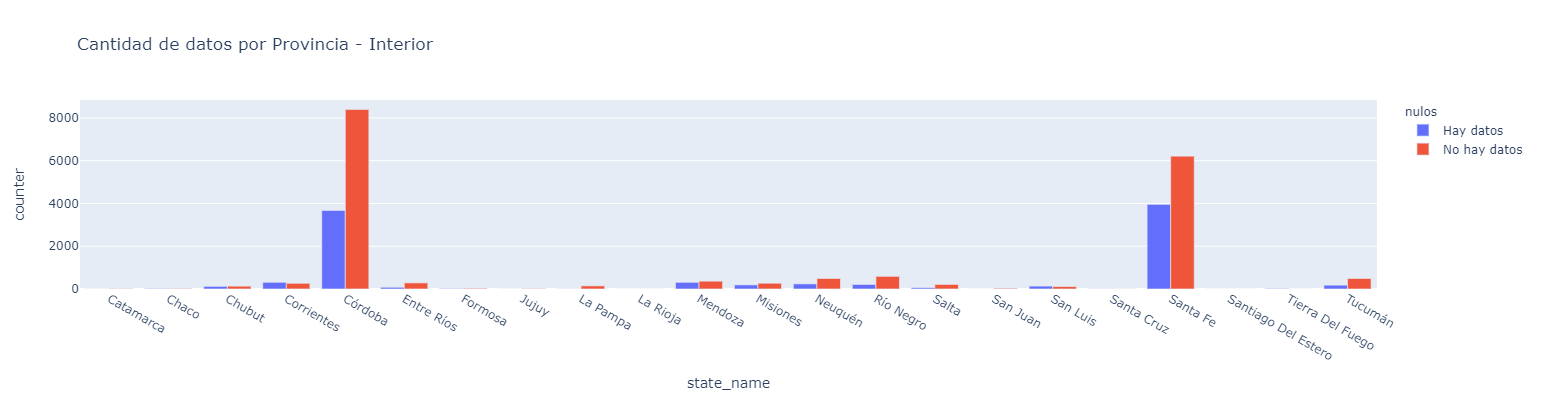

In [197]:
#graficamos los datos faltantes y completos por provincia
fig = px.bar(provincias_group1, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title= "Cantidad de datos por Provincia - Interior")
fig.show()

## Definición sobre variable preponderante
Creemos que la variable mas preponderante en el analisis propuesto por la compañia es el de Precio por metro cuadrado y habiendo dos columnas, una en pesos y otra en dolares, hemos decidido revisar la que está en dolares ya que dicha moneda es mas homogea y se ve afectada en menor medida por el paso del tiempo y la inflación, haciendo comparables los diversos valores. 


In [198]:
#agrupamos nuevamente por provincia trayendo la variable 'price_usd_per_m2' y las variables agregadas de mínimo y máximo
provincias_group2 = provincias.groupby(by=['state_name'],as_index=False)['price_usd_per_m2'].agg(['min', 'max'])

In [199]:
#reseteamos el index
provincias_group2.reset_index(inplace=True)

In [200]:
#generamos una nueva columna, la de rango que es la diferencia entre el precio maximmo y minimo
provincias_group2['rango'] = provincias_group2['max'] - provincias_group2['min']

In [201]:
provincias_group2

,state_name,min,max,rango
0,Catamarca,145.454545,1666.666667,1521.212121
1,Chaco,163.033942,2386.363636,2223.329695
2,Chubut,13.500000,14540.550661,14527.050661
3,Corrientes,83.682008,3500.000000,3416.317992
4,Córdoba,1.184571,30000.000000,29998.815429
5,Entre Ríos,5.608367,24038.461538,24032.853171
6,Formosa,1490.540000,1514.259219,23.719219
7,Jujuy,210.313787,1682.510200,1472.196412
8,La Pampa,392.585700,1402.091875,1009.506175
9,La Rioja,243.029233,243.029233,0.000000


# 2. Buenos Aires y CABA

<ul>
<li>Capital Federal</li>
<li>Bs.As. G.B.A. Zona Sur</li>
<li>Buenos Aires Costa Atlántica</li>
<li>Bs.As. G.B.A. Zona Norte</li>
<li>Bs.As. G.B.A. Zona Oeste</li> 
<li>Buenos Aires Interior</li>
</ul>


In [243]:
#generamos un query por el positivo por todas las jurisdicciones mensionadas y luego una por cada una, para poder analizarlas 
baires = df.query(' state_name == "Capital Federal" | state_name == "Bs.As. G.B.A. Zona Sur" | state_name == "Buenos Aires Costa Atlántica" | state_name == "Bs.As. G.B.A. Zona Norte" | state_name == "Bs.As. G.B.A. Zona Oeste" | state_name == "Buenos Aires Interior"')
caba = df.query(' state_name == "Capital Federal"')
bsas_sur = df.query(' state_name == "Bs.As. G.B.A. Zona Sur"')
bsas_costa = df.query(' state_name == "Buenos Aires Costa Atlántica"')
bsas_norte = df.query(' state_name == "Bs.As. G.B.A. Zona Norte"')
bsas_oeste = df.query(' state_name == "Bs.As. G.B.A. Zona Oeste"')
bsas_interior = df.query(' state_name == "Buenos Aires Interior"')


In [244]:
#tamaño de la máscara
baires.shape

(93447, 29)

In [245]:
## Este dato indica cuantos son los valores faltantes en el dataframe                                                                                                      
len(baires) - len(baires['price_usd_per_m2'].dropna()) 

34451

In [246]:
##generamos una nueva columnam en cada una de las querys y traemos los nulos de la columna de precios en dolares por metro cuadrado

baires['nulos'] = pd.isnull(baires['price_usd_per_m2'])
caba['nulos'] = pd.isnull(caba['price_usd_per_m2'])
bsas_sur['nulos'] = pd.isnull(bsas_sur['price_usd_per_m2'])
bsas_norte['nulos'] = pd.isnull(bsas_norte['price_usd_per_m2'])
bsas_costa['nulos'] = pd.isnull(bsas_costa['price_usd_per_m2'])
bsas_oeste['nulos'] = pd.isnull(bsas_oeste['price_usd_per_m2'])
bsas_interior['nulos'] = pd.isnull(bsas_interior['price_usd_per_m2'])



C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [247]:
baires.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,rooms,expenses,properati_url,description,title,image_thumbnail,counter,surface_total_in_m2_clean,new_price_usd_per_m2,nulos
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,55.0,1127.272727,False
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,1,NaN,NaN,True
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,55.0,1309.090909,False


In [248]:
#generamos una columna con el valor 1 en cada query
baires['counter'] = 1
caba['counter'] = 1
bsas_costa['counter'] = 1
bsas_norte['counter'] = 1
bsas_oeste['counter'] = 1
bsas_sur['counter'] = 1
bsas_interior['counter'] = 1

#generamos vista abreviada de las columnas provincia, precio x metro cuadrado, precio por metro cuadrado en dolares y la columna nulos
baires[['state_name','price_per_m2','price_usd_per_m2','nulos']]

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,state_name,price_per_m2,price_usd_per_m2,nulos
0,Capital Federal,1550.000000,1127.272727,False
1,Bs.As. G.B.A. Zona Sur,NaN,NaN,True
2,Capital Federal,1309.090909,1309.090909,False
3,Capital Federal,NaN,NaN,True
4,Buenos Aires Costa Atlántica,1828.571429,1828.571429,False
...,...,...,...,...
121215,Capital Federal,9354.838710,7699.115044,False
121216,Bs.As. G.B.A. Zona Norte,1383.333333,1383.333333,False
121217,Capital Federal,3371.794872,2858.695652,False
121218,Buenos Aires Costa Atlántica,1997.916667,1997.916667,False


In [249]:
#agrupamos las provincias por provincia y la columna nulos, totalizando la cantidad de nulos por la columna counter 
baires_group1 = baires.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()

In [250]:
#transformamos la columna nulo en string
baires_group1['nulos'] = baires_group1['nulos'].astype(str)

In [251]:
#reemplazamos False por "hay datos "y True por "no hay datos"
baires_group1['nulos'] = baires_group1.nulos.str.replace('False','Hay datos')
baires_group1['nulos'] = baires_group1.nulos.str.replace('True','No hay datos')

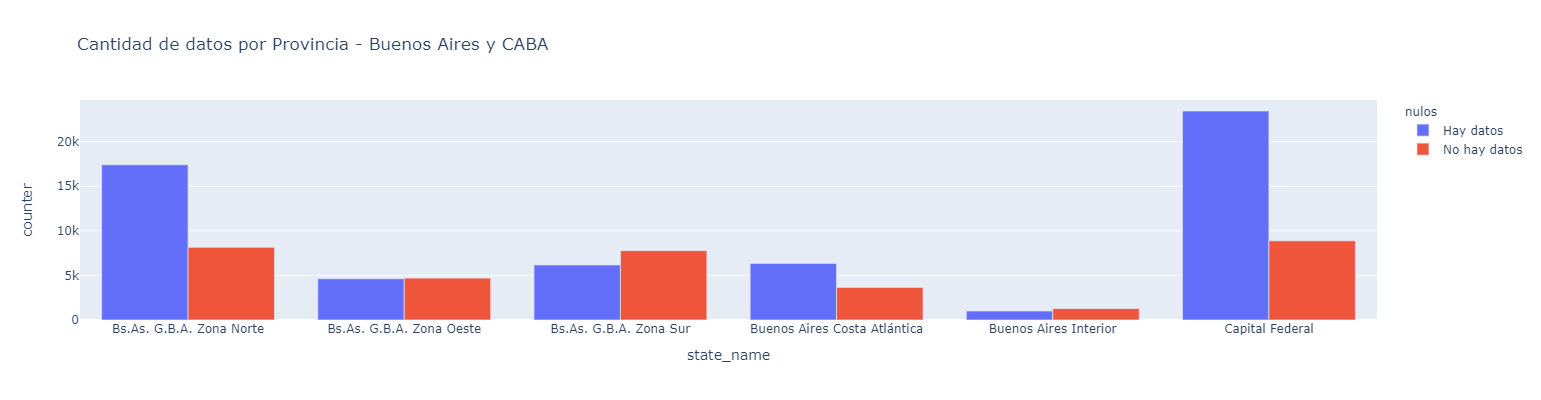

In [252]:
#imprimimos gráfico
fig = px.bar(baires_group1, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title = "Cantidad de datos por Provincia - Buenos Aires y CABA")
fig.show()



In [253]:
#agrupamos nuevamente por provincia trayendo la variable 'price_usd_per_m2' y las variables agregadas de mínimo y máximo
baires_group2 = baires.groupby(by=['state_name'],as_index=False)['price_usd_per_m2'].agg(['min', 'max'])

In [254]:
#reseteamos el index
baires_group2.reset_index(inplace=True)

In [255]:
#creamos la columna rango
baires_group2['rango'] = baires_group2['max'] - baires_group2['min']

In [256]:
baires_group2

,state_name,min,max,rango
0,Bs.As. G.B.A. Zona Norte,4.166667,48296.222222,48292.055556
1,Bs.As. G.B.A. Zona Oeste,7.000000,80000.000000,79993.000000
2,Bs.As. G.B.A. Zona Sur,19.314341,23140.764706,23121.450365
3,Buenos Aires Costa Atlántica,1.000000,21897.058824,21896.058824
4,Buenos Aires Interior,2.072029,4166.666667,4164.594638
5,Capital Federal,13.797467,206333.333333,206319.535867


In [257]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
caba_barrios_grupo = caba.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
caba_barrios_grupo['nulos'] = caba_barrios_grupo['nulos'].astype(str)
caba_barrios_grupo['nulos'] = caba_barrios_grupo.nulos.str.replace('False','Hay datos')
caba_barrios_grupo['nulos'] = caba_barrios_grupo.nulos.str.replace('True','No hay datos')

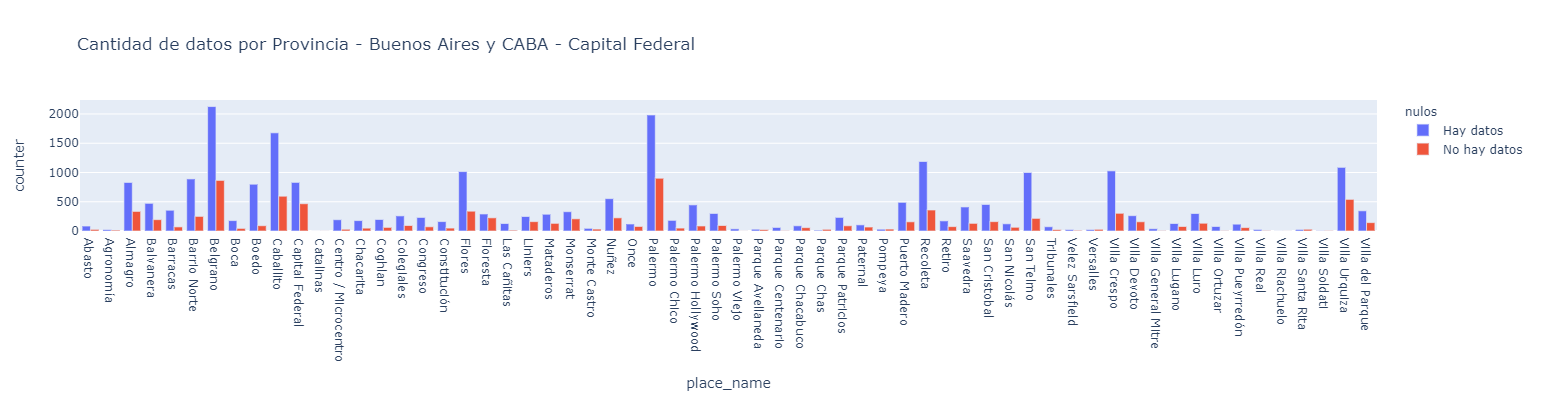

In [258]:
fig = px.bar(caba_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Capital Federal")
fig.show()



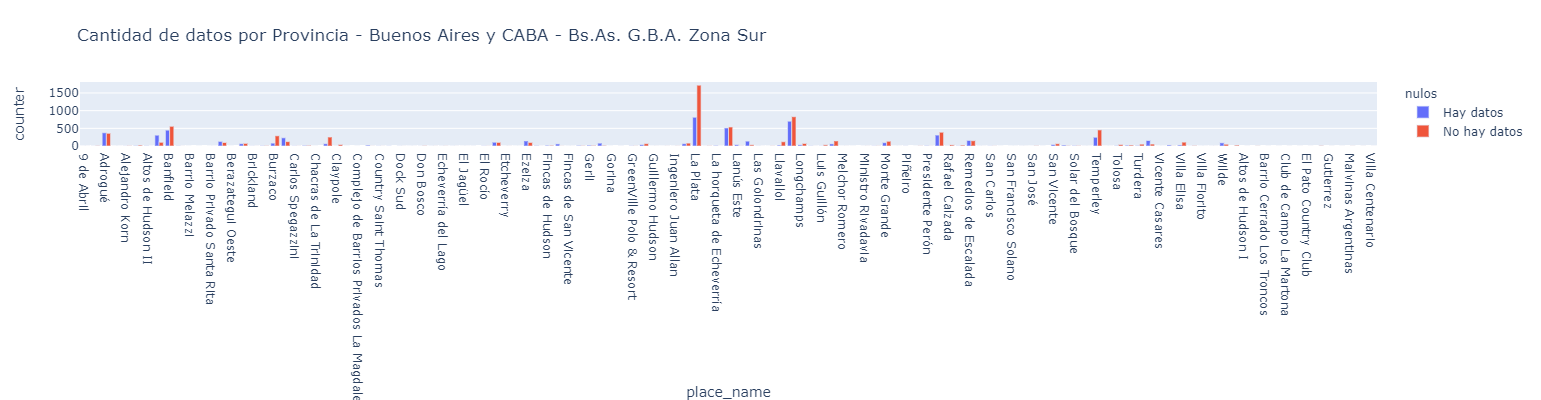

In [259]:
bsas_sur_barrios_group = bsas_sur.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group['nulos'].astype(str)
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group.nulos.str.replace('False','Hay datos')
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_sur_barrios_group, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" Cantidad de datos por Provincia - Buenos Aires y CABA - Bs.As. G.B.A. Zona Sur")
fig.show()



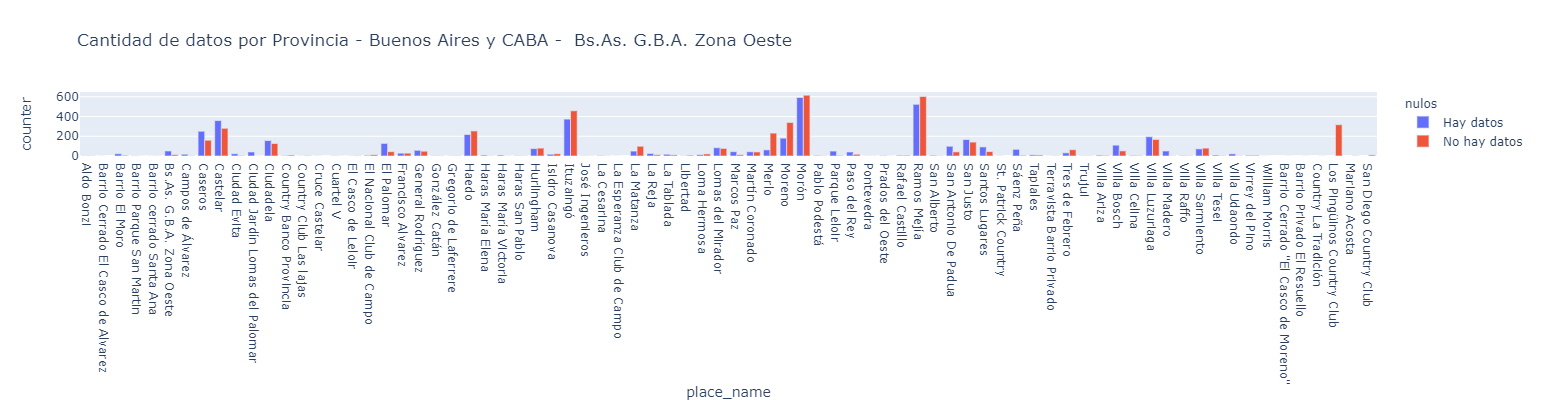

In [260]:
bsas_oeste_barrios_grupo = bsas_oeste.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo['nulos'].astype(str)
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_oeste_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" Cantidad de datos por Provincia - Buenos Aires y CABA -  Bs.As. G.B.A. Zona Oeste")
fig.show()



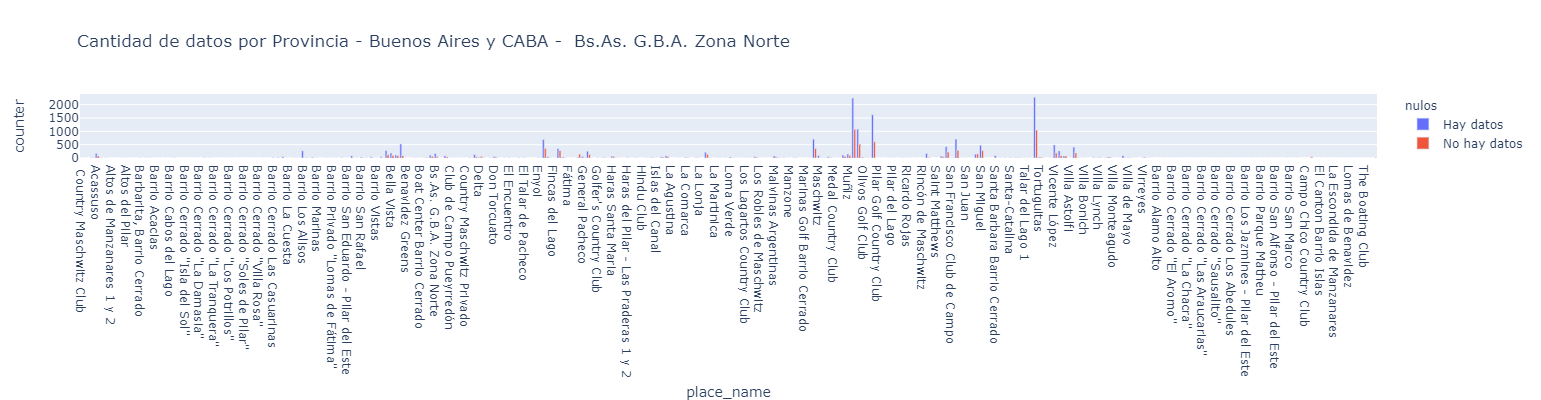

In [261]:
bsas_norte_barrios_grupo = bsas_norte.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo['nulos'].astype(str)
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_norte_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" Cantidad de datos por Provincia - Buenos Aires y CABA -  Bs.As. G.B.A. Zona Norte")
fig.show()

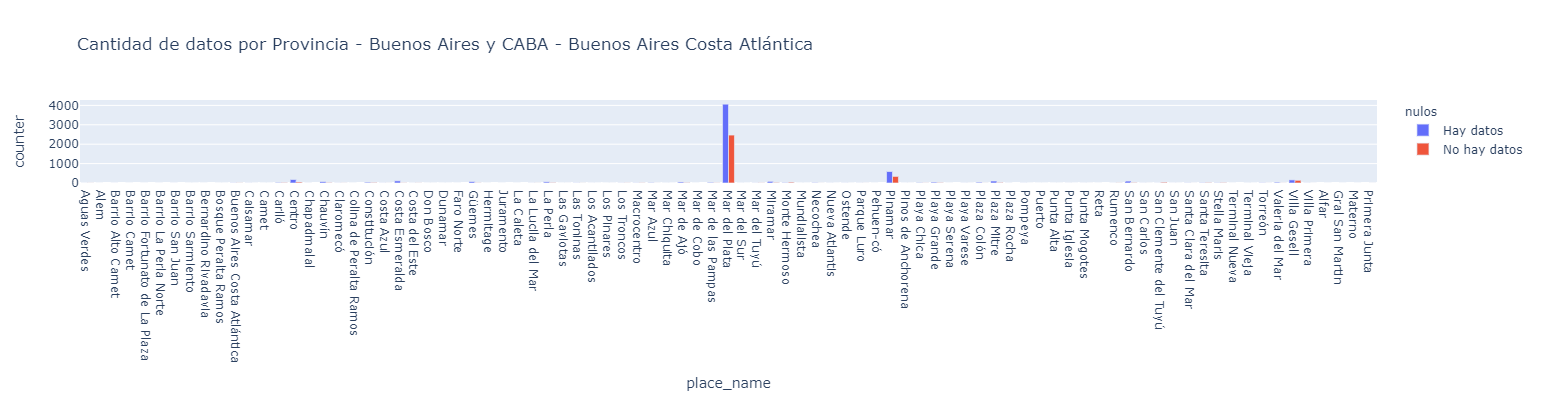

In [262]:
bsas_costa_barrios_grupo = bsas_costa.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo['nulos'].astype(str)
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_costa_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Costa Atlántica")
fig.show()

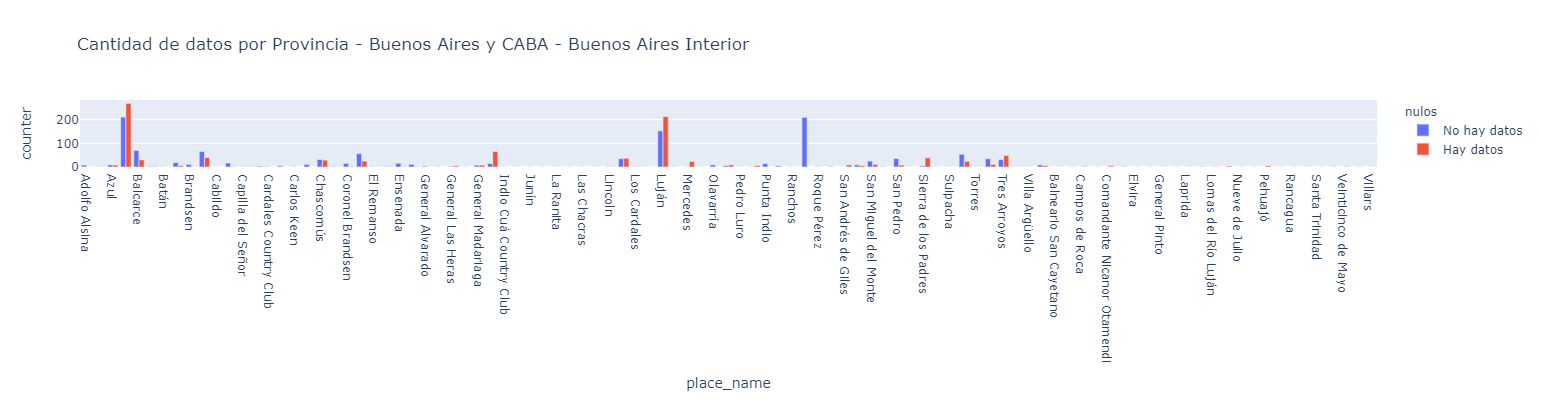

In [263]:
bsas_interior_barrios_grupo = bsas_interior.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo['nulos'].astype(str)
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_interior_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Interior")
fig.show()

 # Detección
Habiendo definido que la variable mas preponderante para el analisis es la de precio por metro cuadrado en dólares y que la pérdida de datos en dicha columna asciende al 43% intentaremos disminuir el porcentaje de datos perdidos recalculando este dato por medio de la relacion establecida con las columnas price_aprox_usd (%  16.83 datos perdidos), surface_total_in_m2 (datos perdidos % 32.44) y para cuando esta no este disponible, la rellenaremos con surface_covered_in_m2 (datos perdidos % 16.42).




In [264]:
#Creamos una nueva columna en la que utilizaremos los datos faltantes en la columna de metros cuadrados totales atribuyendole a los faltantes el dato incluido
#en metros cuadrados cubiertos
df['surface_total_in_m2_clean'] = df['surface_total_in_m2']
#hacemos una mascara de nulos en total m2
data_suptotal_nulos_mask = df['surface_total_in_m2'].isnull()
#reemplazamos los faltantes por m2 covered
df.loc[data_suptotal_nulos_mask, "surface_total_in_m2_clean"] = df['surface_covered_in_m2']
#mascara de nulos de la nueva columna
data_suptotal_clean_nulos_mask = df['surface_total_in_m2_clean'].isnull()
#comparamos datos originales con datos salvados
print("metros2 nulos original",df[data_suptotal_nulos_mask].shape, "metroscuadrados nulos clean", df[data_suptotal_clean_nulos_mask].shape)


metros2 nulos original (39328, 29) metroscuadrados nulos clean (12369, 29)


In [265]:
#Creamos una columna que agrupa precios en dolares sin nulos y superficie total sin nulos y divide el primero por el segundo, sacando el valor 
#de un metro cuadrado de dicho inmueble.
df['new_price_usd_per_m2'] = df['price_aprox_usd']/ df['surface_total_in_m2_clean']
#en esta nueva columna, sabemos que los NaN y ceros, seran los numeros que no cuenten o con el valor en dolares o con superficie asignada
df.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,counter,surface_total_in_m2_clean,new_price_usd_per_m2
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,55.0,1127.272727
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,1,NaN,NaN
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,55.0,1309.090909


In [266]:
#Creamos una copia del dataframe, la se que slicea tomando los datos de superficie total salvados mayores a cero
df_2 = df[df['surface_total_in_m2_clean'] > 1]
#se genera una nueva columna con los datos de dolares / m2 salvados y mayores a cero
df_2['new_price_usd_per_m2'] = df_2['price_aprox_usd']/ df_2['surface_total_in_m2_clean']
#dropeo de nulos en la columna
df_3 = df_2.dropna(subset=['new_price_usd_per_m2'])
df_3.head(3)


#print(df_2.shape,df.shape )

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,counter,surface_total_in_m2_clean,new_price_usd_per_m2
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,55.0,1127.272727
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,55.0,1309.090909
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,1,35.0,1828.571429


In [267]:
print("limpia",df_3['new_price_usd_per_m2'].describe(),"original",df.price_usd_per_m2.describe())
df_3_nonulos = df_3['price_usd_per_m2'].notnull()
df_3[df_3_nonulos][['new_price_usd_per_m2','price_usd_per_m2']].describe()
#compruebo que si utilizo los datos que no contienen nulos en el original de usd/m2 y lo comparo con el recalculado por nosotros obtengo los mismos indicadores estadisticos. 


limpia count     92713.000000
mean       2266.723629
std        3262.247670
min           0.600000
25%        1234.782609
50%        1800.000000
75%        2467.640000
max      224334.704800
Name: new_price_usd_per_m2, dtype: float64 original count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64


,new_price_usd_per_m2,price_usd_per_m2
count,68617.000000,68617.000000
mean,2160.086916,2160.086916
std,2759.288621,2759.288621
min,0.600000,0.600000
25%,1218.181818,1218.181818
50%,1800.000000,1800.000000
75%,2486.411765,2486.411765
max,206333.333333,206333.333333


Hemos demostrado de esta manera, que las variables no nulas contenidas en la columna precio en dolares por metro cuadrado del DF original se comportan de manera similar que las generadas en nuestra nueva columna.
Realizamos el analisis de las provincias nuevamente imprimiendo los datos nuevos.


In [325]:
#carga de Querys
df_3_provincias = df_3.query(' state_name != "Capital Federal" & state_name != "Bs.As. G.B.A. Zona Sur" & state_name != "Buenos Aires Costa Atlántica" & state_name != "Bs.As. G.B.A. Zona Norte" & state_name != "Bs.As. G.B.A. Zona Oeste" & state_name != "Buenos Aires Interior"')
df_3_baires = df_3.query(' state_name == "Capital Federal" | state_name == "Bs.As. G.B.A. Zona Sur" | state_name == "Buenos Aires Costa Atlántica" | state_name == "Bs.As. G.B.A. Zona Norte" | state_name == "Bs.As. G.B.A. Zona Oeste" | state_name == "Buenos Aires Interior"')
df_3_caba = df_3.query(' state_name == "Capital Federal"')
df_3_bsas_sur = df_3.query(' state_name == "Bs.As. G.B.A. Zona Sur"')
df_3_bsas_costa = df_3.query(' state_name == "Buenos Aires Costa Atlántica"')
df_3_bsas_norte = df_3.query(' state_name == "Bs.As. G.B.A. Zona Norte"')
df_3_bsas_oeste = df_3.query(' state_name == "Bs.As. G.B.A. Zona Oeste"')
df_3_bsas_interior = df_3.query(' state_name == "Buenos Aires Interior"')

##generamos una nueva columnam en cada una de las querys y traemos los nulos de la columna de precios en dolares por metro cuadrado
df_3_provincias['nulos'] = pd.isnull(df_3_provincias['new_price_usd_per_m2'])
df_3_baires['nulos'] = pd.isnull(df_3_baires['new_price_usd_per_m2'])
df_3_caba['nulos'] = pd.isnull(df_3_caba['new_price_usd_per_m2'])
df_3_bsas_sur['nulos'] = pd.isnull(df_3_bsas_sur['new_price_usd_per_m2'])
df_3_bsas_norte['nulos'] = pd.isnull(df_3_bsas_norte['new_price_usd_per_m2'])
df_3_bsas_costa['nulos'] = pd.isnull(df_3_bsas_costa['new_price_usd_per_m2'])
df_3_bsas_oeste['nulos'] = pd.isnull(df_3_bsas_oeste['new_price_usd_per_m2'])
df_3_bsas_interior['nulos'] = pd.isnull(df_3_bsas_interior['new_price_usd_per_m2'])

#generamos una columna con el valor 1 en cada query
df_3_provincias['counter'] = 1
df_3_baires['counter'] = 1
df_3_caba['counter'] = 1
df_3_bsas_costa['counter'] = 1
df_3_bsas_norte['counter'] = 1
df_3_bsas_oeste['counter'] = 1
df_3_bsas_sur['counter'] = 1
df_3_bsas_interior['counter'] = 1

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

# 1. Interior

In [269]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_provincias['new_price_usd_per_m2'].describe(),"original",provincias.price_usd_per_m2.describe())

limpia count    14687.000000
mean      1937.026079
std       3554.575536
min          0.600000
25%        937.500000
50%       1399.617500
75%       1780.434127
max      60000.000000
Name: new_price_usd_per_m2, dtype: float64 original count     9621.000000
mean      1680.032501
std       2921.725800
min          0.600000
25%        961.497326
50%       1423.662462
75%       1754.172698
max      57382.080000
Name: price_usd_per_m2, dtype: float64


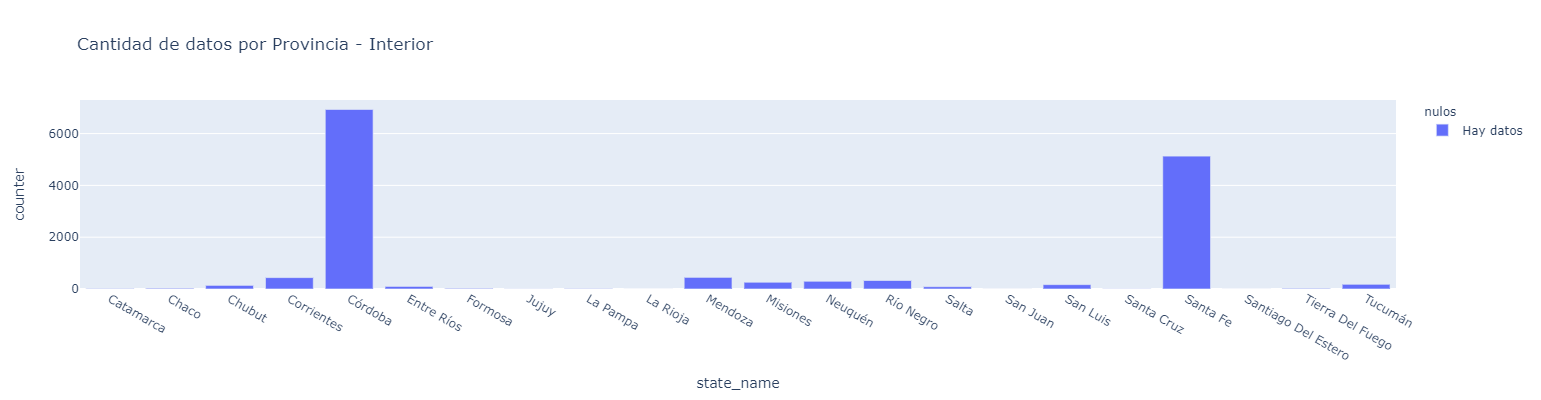

In [270]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_provincias_grupo = df_3_provincias.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()
df_3_provincias_grupo['nulos'] = df_3_provincias_grupo['nulos'].astype(str)
df_3_provincias_grupo['nulos'] = df_3_provincias_grupo.nulos.str.replace('False','Hay datos')
df_3_provincias_grupo['nulos'] = df_3_provincias_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_provincias_grupo, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Interior")
fig.show()

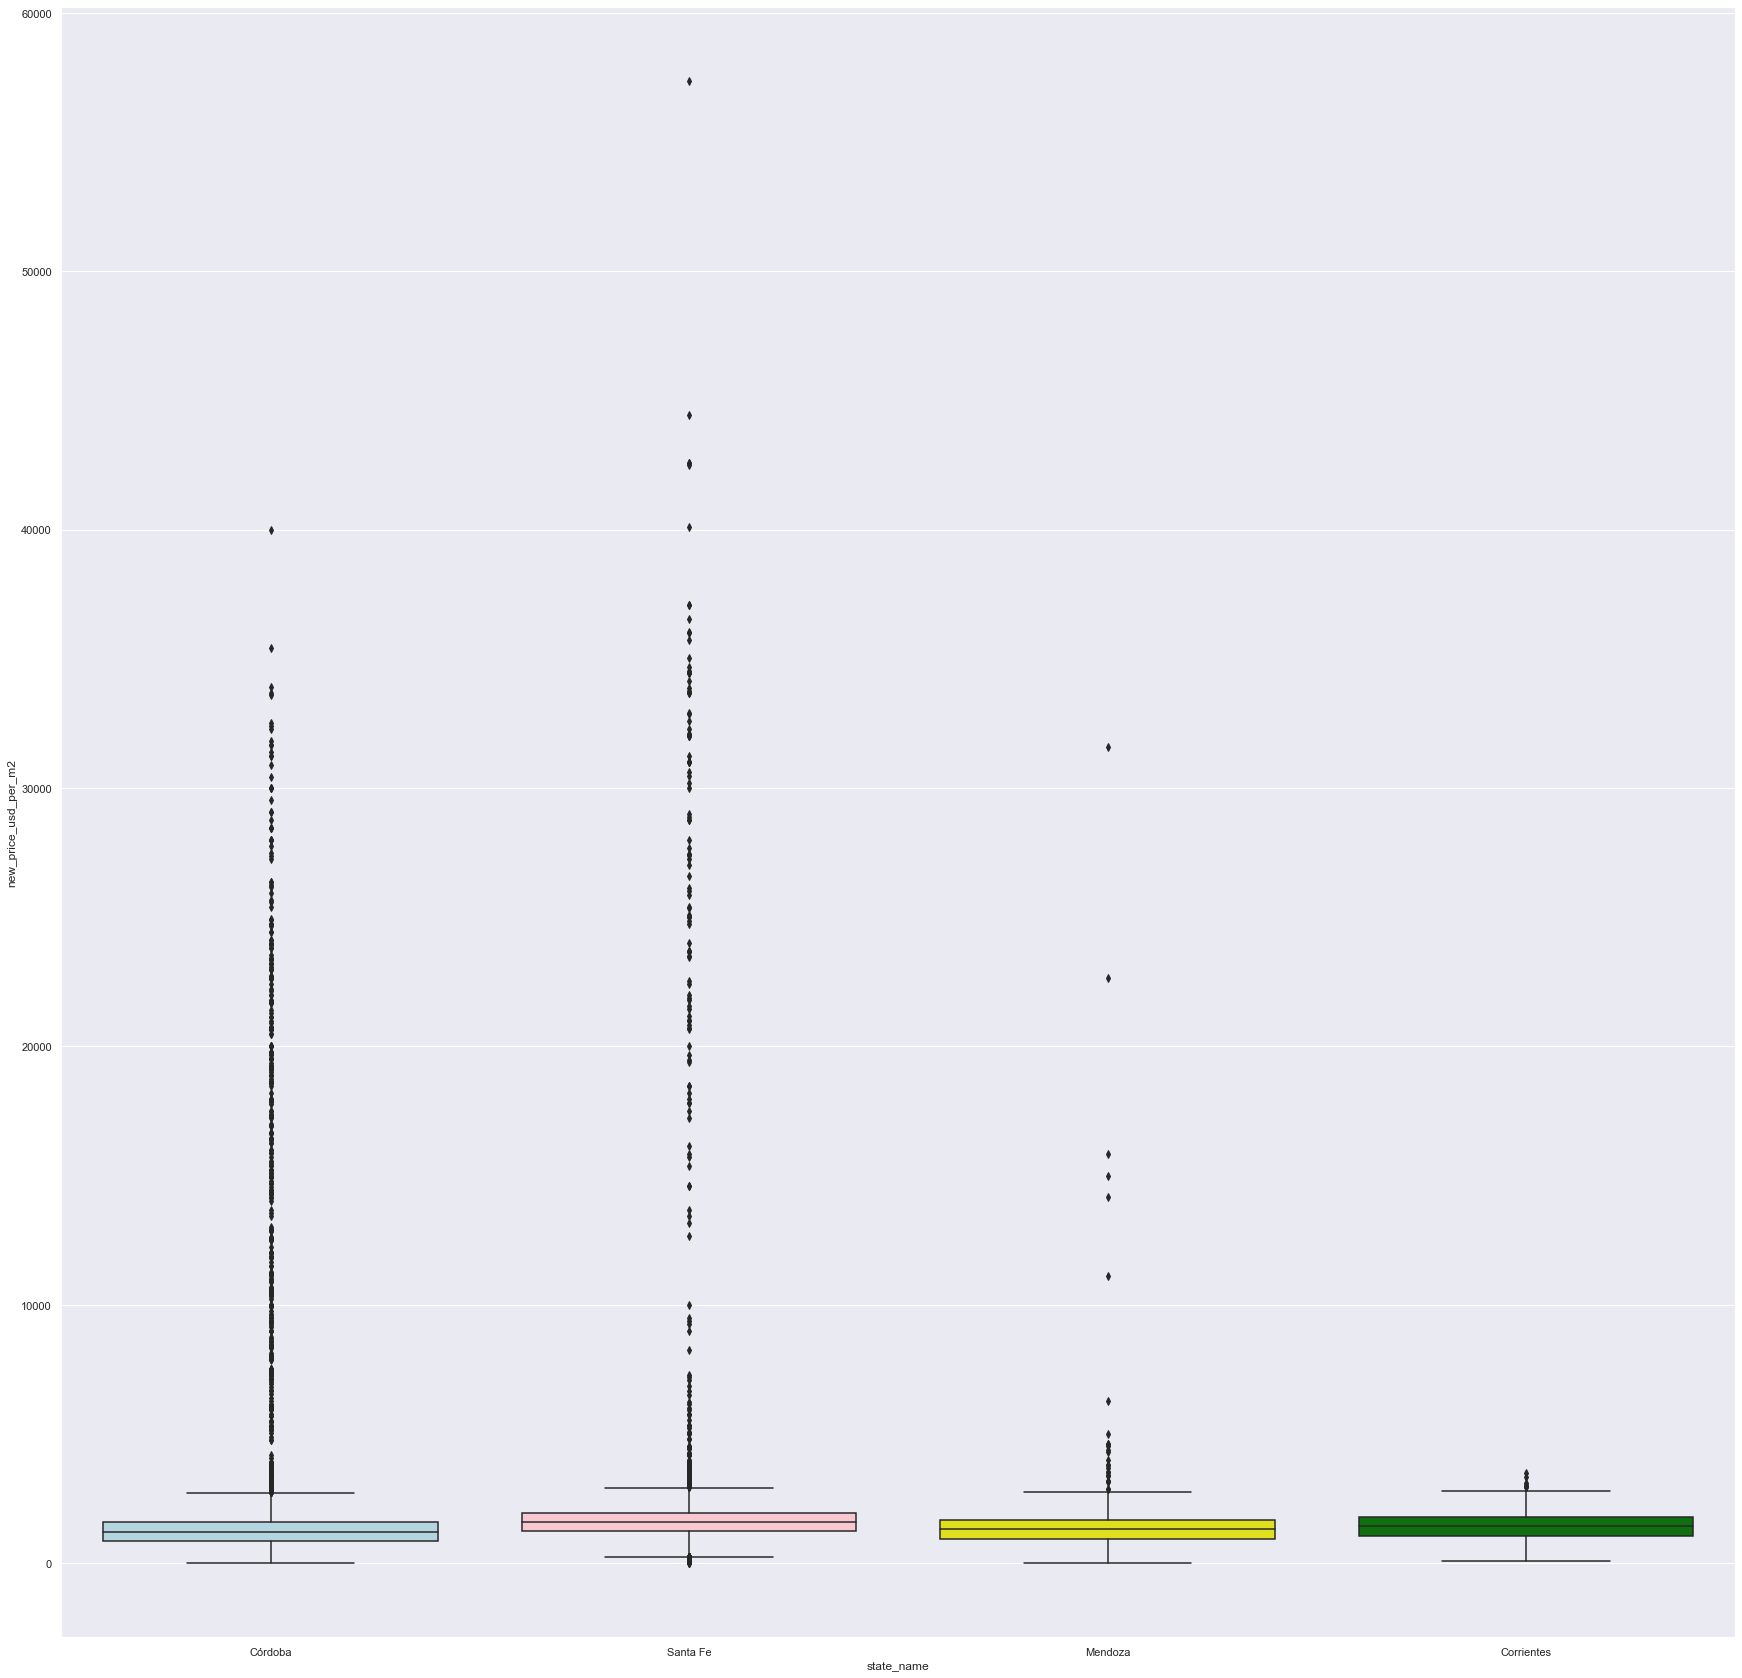

In [271]:
#creamos una lista de las provincias con mayor cantidad de datos
suburb_values = ['Córdoba', 'Santa Fe', 'Mendoza', 'Corrientes', 'Neuquen']
data_suburb_mask = df_3_provincias.state_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_provincias.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("state_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})


# Analisis
Vemos necesario establecer un monto máximo de valor del metro cuadrado para reducir los outliers

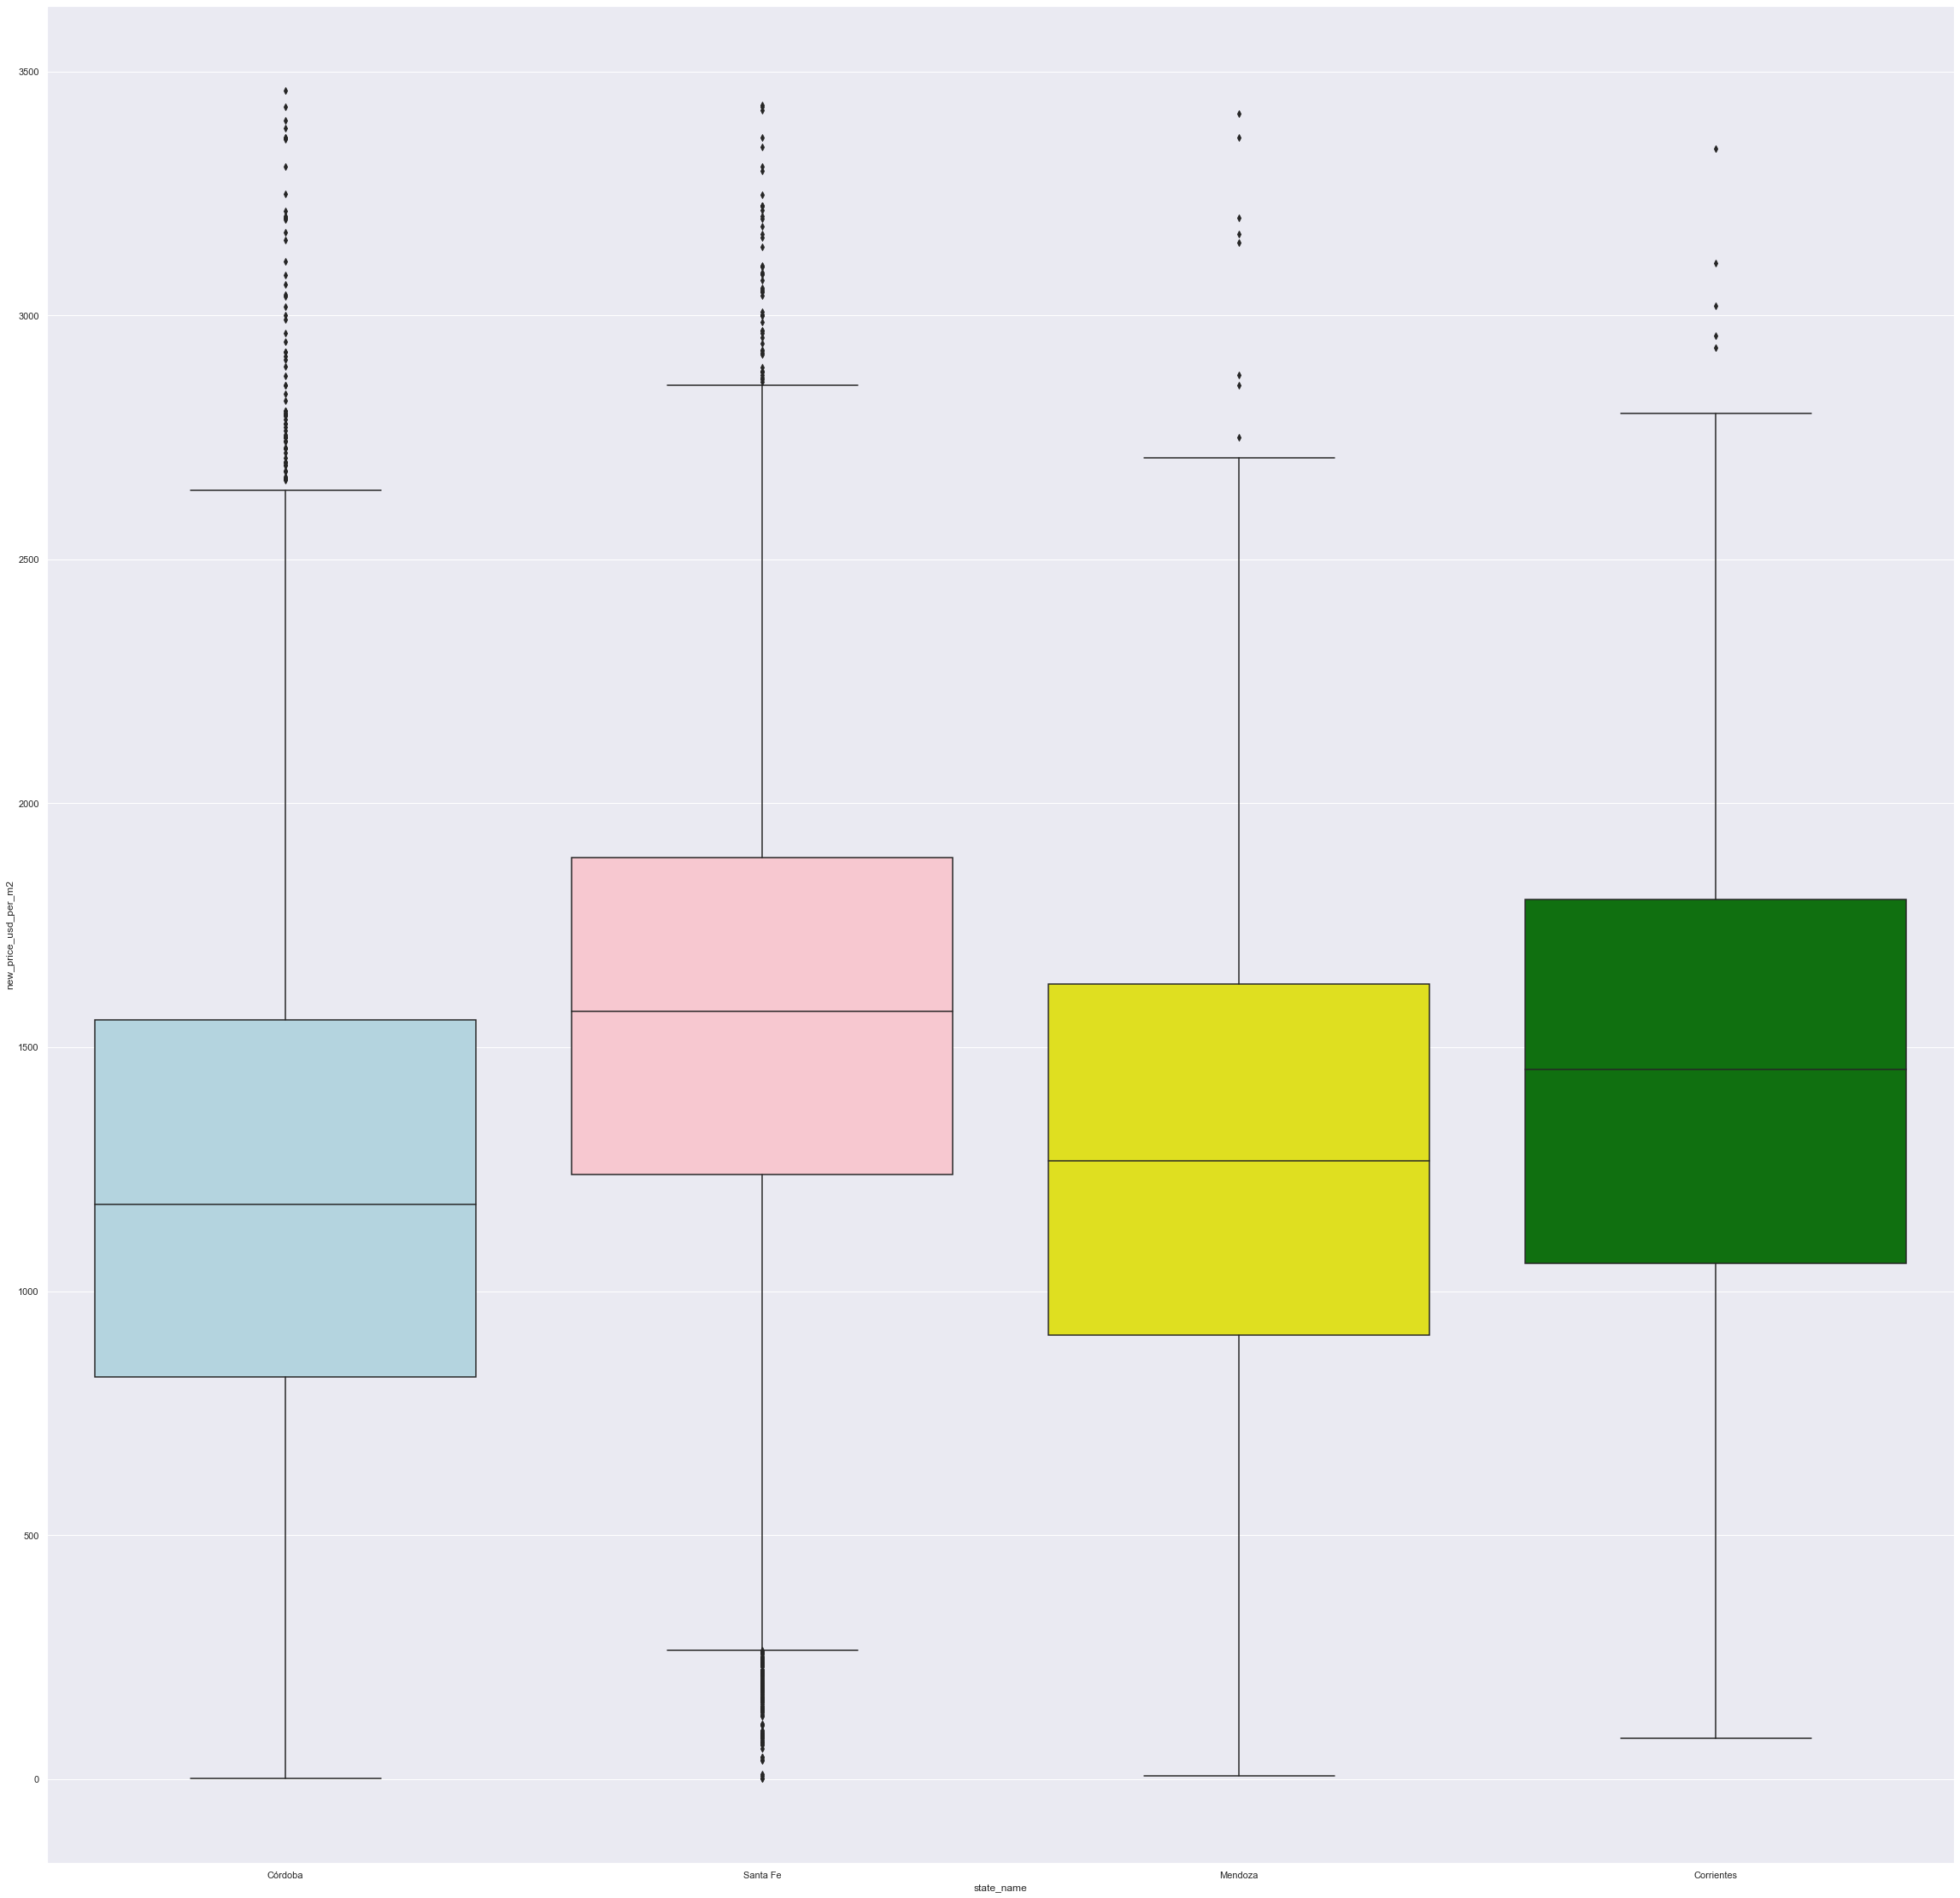

In [281]:
#establecemos que en los menores USD 3500 es donde los datos se encuentran mas concentrados 
df_4_provincias = df_3_provincias[df_3_provincias['new_price_usd_per_m2'] < 3500]
#creamos una lista de las provincias con mayor cantidad de datos
suburb_values = ['Córdoba', 'Santa Fe', 'Mendoza', 'Corrientes', 'Neuquen']
data_suburb_mask = df_4_provincias.state_name.apply(lambda x: x in suburb_values)
data_suburb = df_4_provincias.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("state_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(30,30)})

In [282]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 3500",df_4_provincias['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_provincias['new_price_usd_per_m2'].describe(),"original",provincias.price_usd_per_m2.describe())

limpia con tope 3500 count    14024.000000
mean      1332.101646
std        622.779431
min          0.600000
25%        913.550570
50%       1360.976793
75%       1714.285714
max       3471.315789
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count    14687.000000
mean      1937.026079
std       3554.575536
min          0.600000
25%        937.500000
50%       1399.617500
75%       1780.434127
max      60000.000000
Name: new_price_usd_per_m2, dtype: float64 original count     9621.000000
mean      1680.032501
std       2921.725800
min          0.600000
25%        961.497326
50%       1423.662462
75%       1754.172698
max      57382.080000
Name: price_usd_per_m2, dtype: float64


# conclusion
Es concluyente que la variable limpia con el tope que quita los outliers concentra mejor los datos y reduce el desvio estandar


# 2. Buenos Aires y CABA

In [283]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_baires['new_price_usd_per_m2'].describe(),"original",baires.price_usd_per_m2.describe())

limpia count     78026.000000
mean       2328.783300
std        3200.469540
min           1.000000
25%        1313.464457
50%        1909.090909
75%        2566.666667
max      224334.704800
Name: new_price_usd_per_m2, dtype: float64 original count     58996.000000
mean       2238.373639
std        2723.896830
min           1.000000
25%        1277.777778
50%        1909.090909
75%        2583.333333
max      206333.333333
Name: price_usd_per_m2, dtype: float64


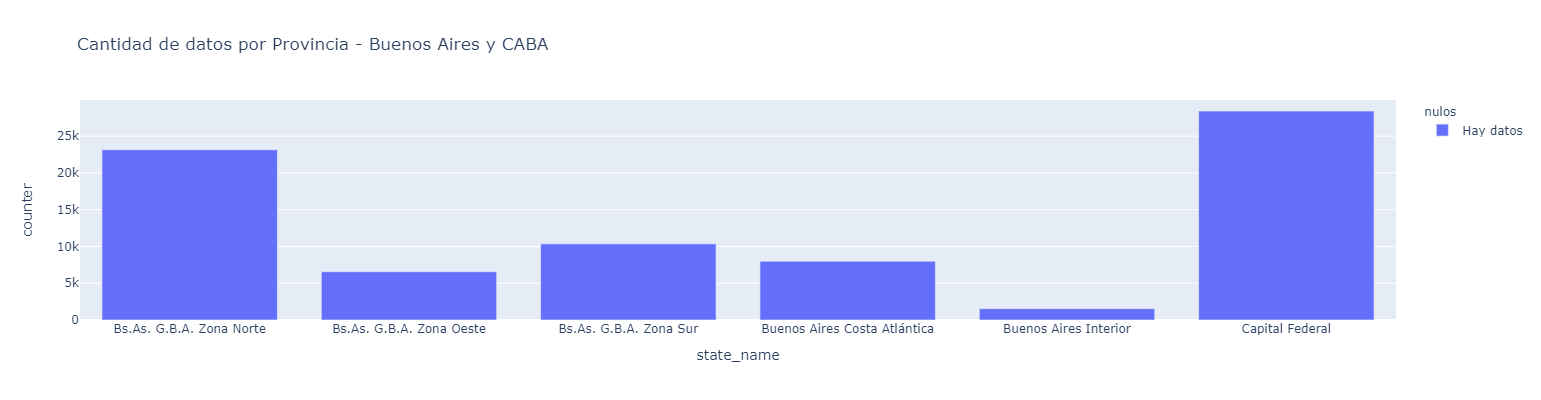

In [284]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_baires_grupo = df_3_baires.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()
df_3_baires_grupo['nulos'] = df_3_baires_grupo['nulos'].astype(str)
df_3_baires_grupo['nulos'] = df_3_baires_grupo.nulos.str.replace('False','Hay datos')
df_3_baires_grupo['nulos'] = df_3_baires_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_baires_grupo, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA")
fig.show()

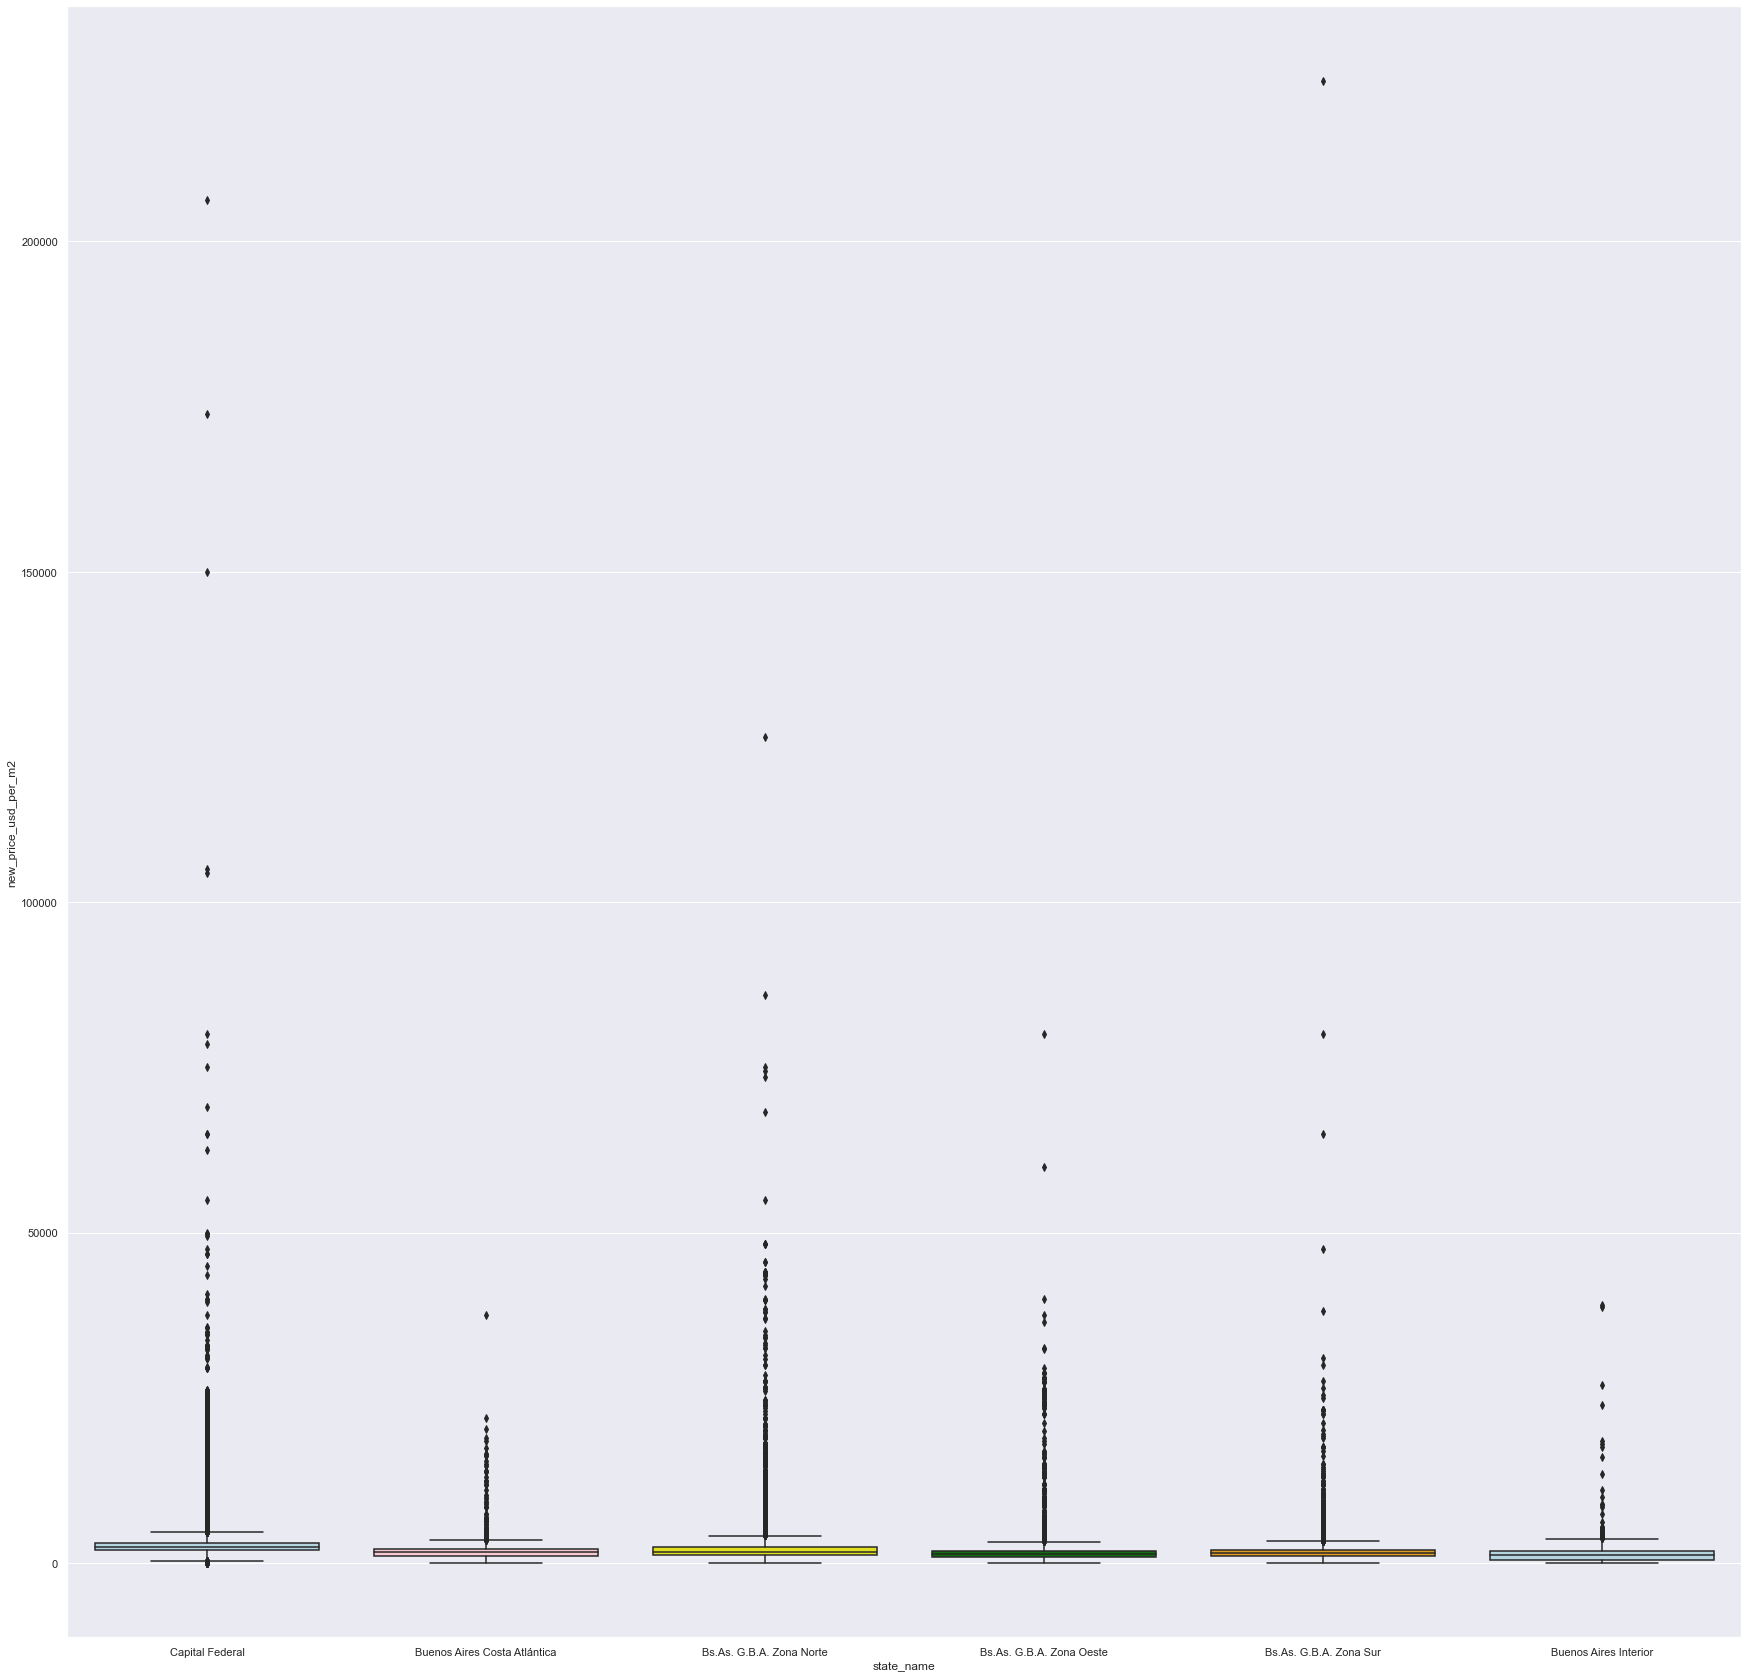

In [285]:
#creamos una lista de las provincias con mayor cantidad de datos
suburb_values = ['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur', 'Buenos Aires Costa Atlántica', 'Buenos Aires Interior','Capital Federal' ]
data_suburb_mask = df_3_baires.state_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_baires.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("state_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})


# Analisis
Vemos necesario establecer un monto máximo de valor del metro cuadrado para reducir los outliers

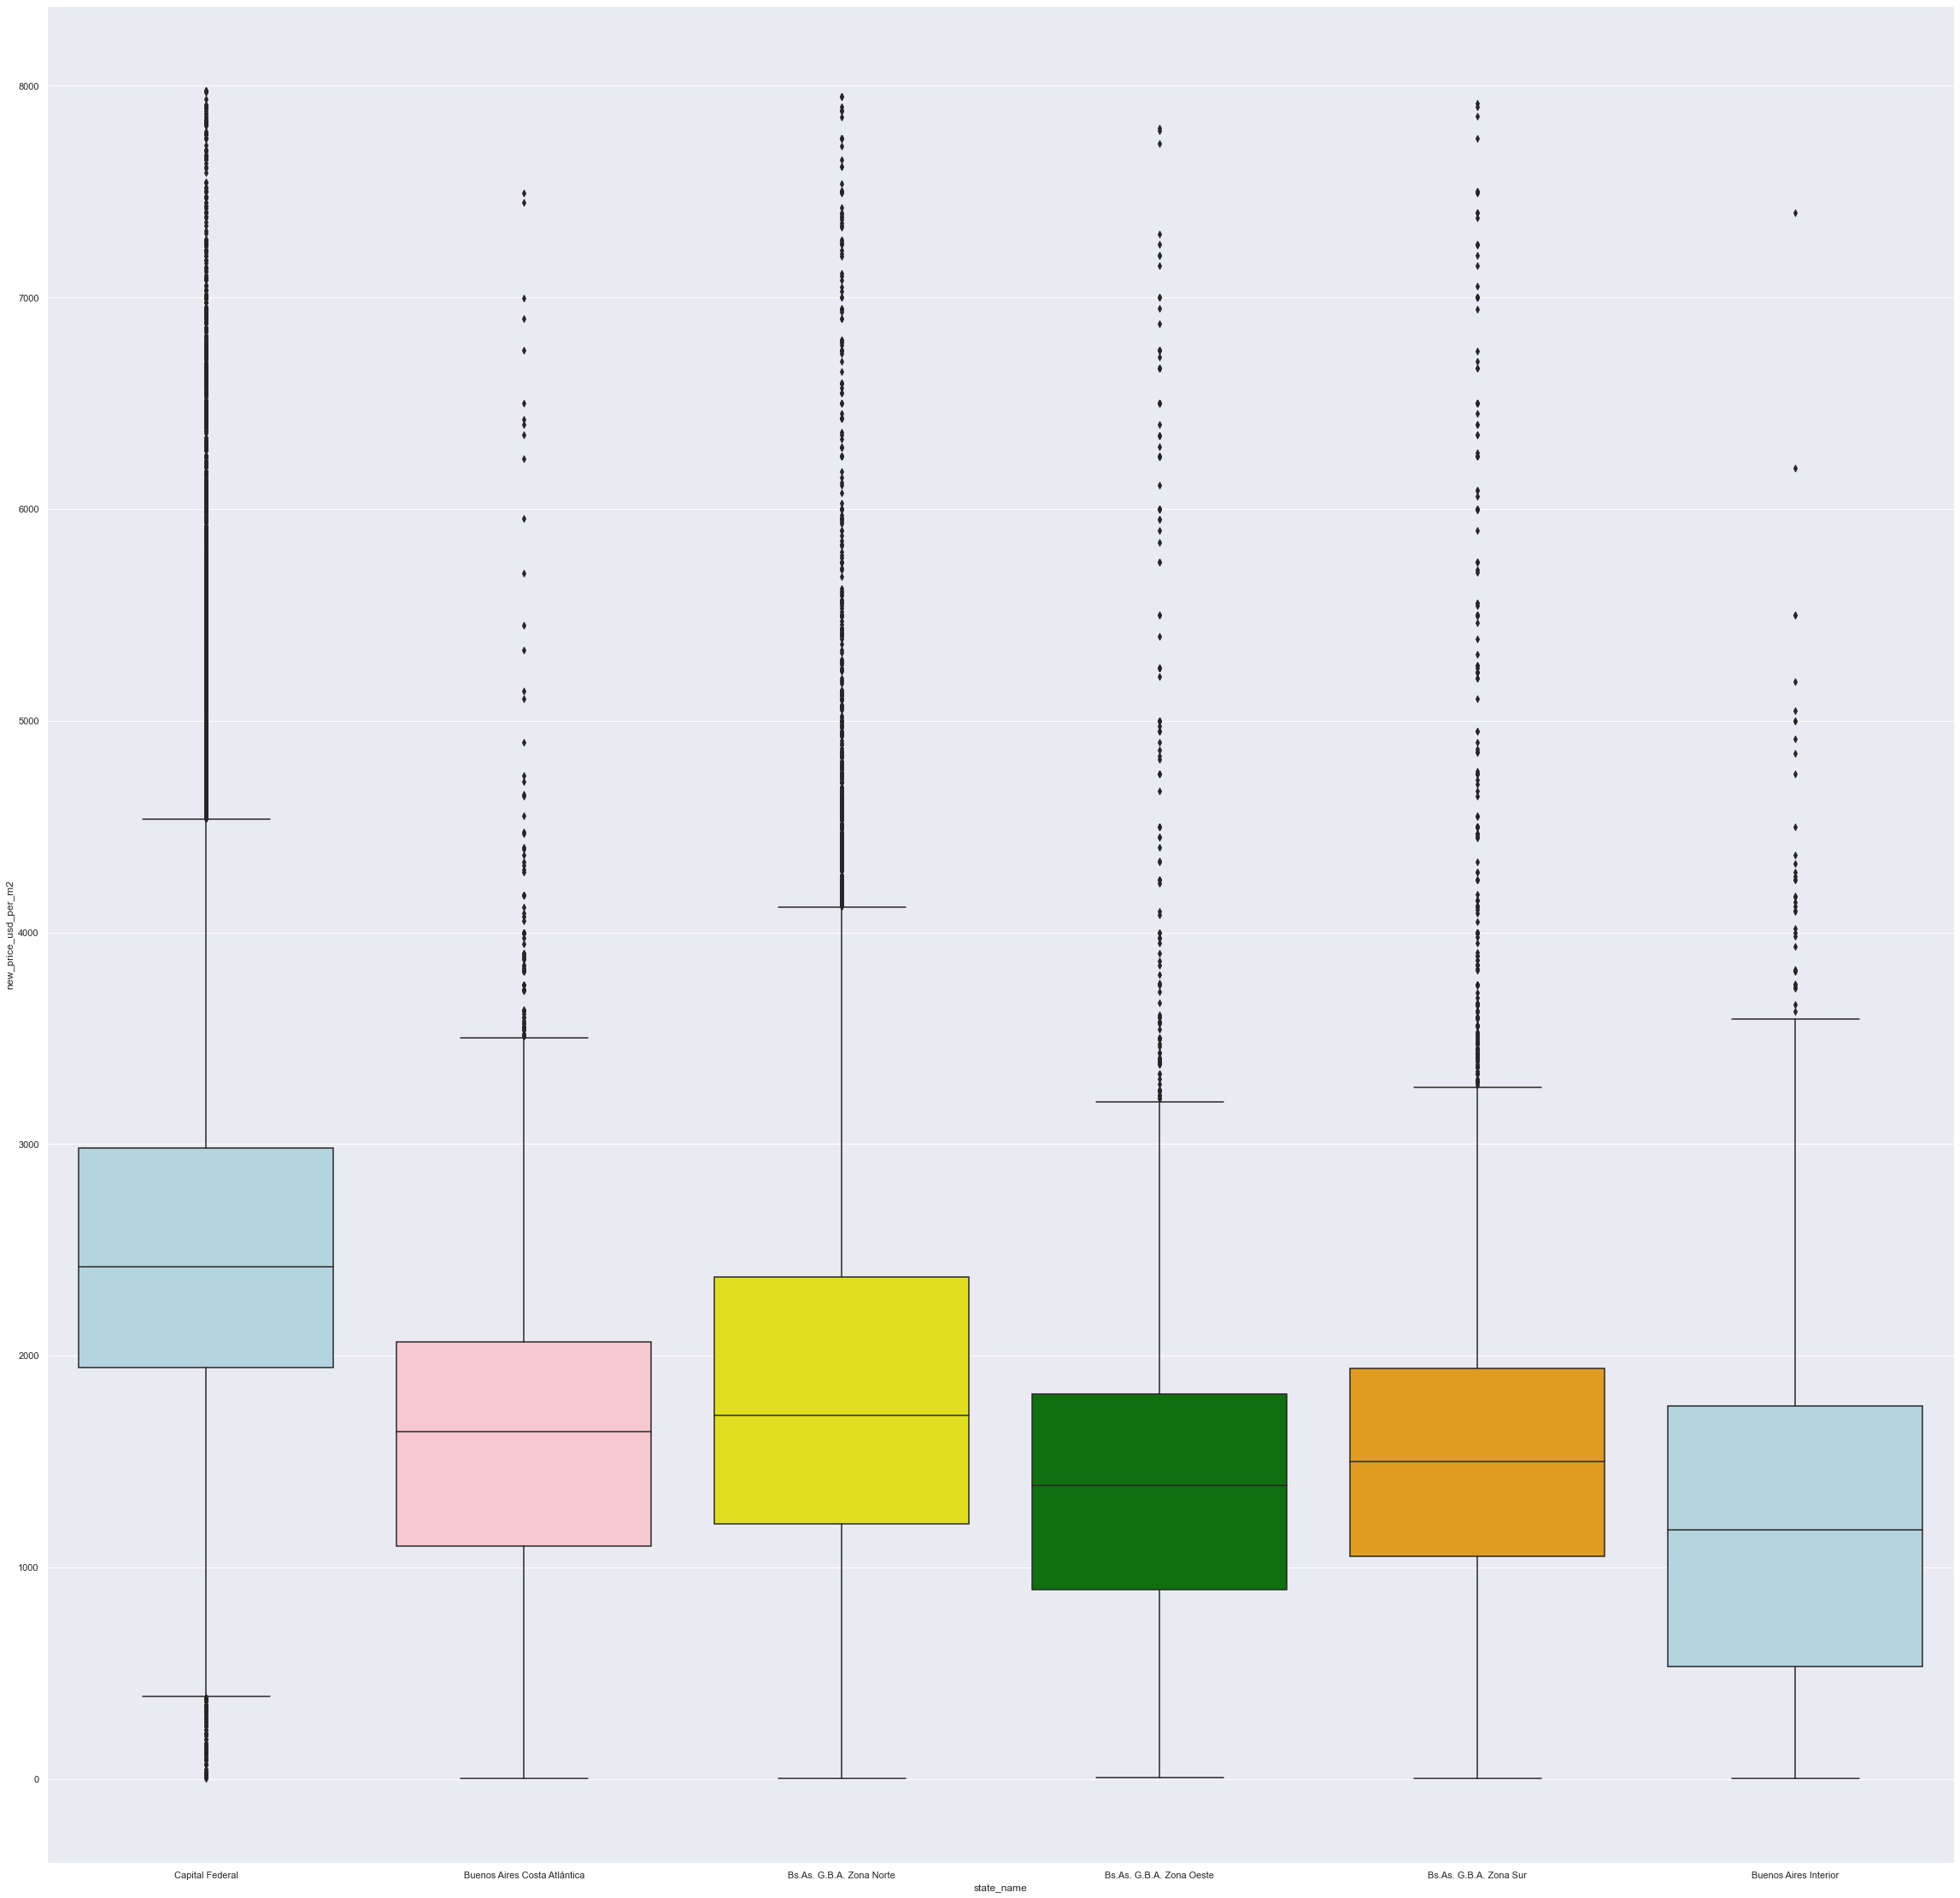

In [290]:
#establecemos que en los menores USD 8000 es donde los datos se encuentran mas concentrados 
df_4_baires = df_3_baires[df_3_baires['new_price_usd_per_m2'] < 8000]
#creamos una lista de las provincias con mayor cantidad de datos
suburb_values = ['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur', 'Buenos Aires Costa Atlántica', 'Buenos Aires Interior','Capital Federal' ]
data_suburb_mask = df_4_baires.state_name.apply(lambda x: x in suburb_values)
data_suburb = df_4_baires.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("state_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [291]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia con tope 8000",df_4_baires['new_price_usd_per_m2'].describe(),"limpia sin tope",df_3_baires['new_price_usd_per_m2'].describe(),"original",baires.price_usd_per_m2.describe())

limpia con tope 8000 count    76501.000000
mean      1998.710920
std       1079.546111
min          1.000000
25%       1300.000000
50%       1888.888889
75%       2513.661202
max       7978.723404
Name: new_price_usd_per_m2, dtype: float64 limpia sin tope count     78026.000000
mean       2328.783300
std        3200.469540
min           1.000000
25%        1313.464457
50%        1909.090909
75%        2566.666667
max      224334.704800
Name: new_price_usd_per_m2, dtype: float64 original count     58996.000000
mean       2238.373639
std        2723.896830
min           1.000000
25%        1277.777778
50%        1909.090909
75%        2583.333333
max      206333.333333
Name: price_usd_per_m2, dtype: float64


# Analisis
Es concluyente que el establecimiento de de valores maximos mejora los indicadores estadisticos, pero es necesario un establecimiento de valores maximos por jurisdicción ya que, a diferencia del interior, en la CABA la media es mas alta que en todo el pais, haciendo que enel resto de buenos aires pudieramos dropear en valores mas bajos.

# 2. A. CABA

In [294]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_caba['new_price_usd_per_m2'].describe(),"original",caba.price_usd_per_m2.describe())

limpia count     28416.000000
mean       3146.159073
std        3935.417020
min           3.208556
25%        1964.912281
50%        2454.545455
75%        3062.640766
max      206333.333333
Name: new_price_usd_per_m2, dtype: float64 original count     23434.000000
mean       3116.930444
std        3681.030087
min          13.797467
25%        1966.062830
50%        2468.750000
75%        3076.923077
max      206333.333333
Name: price_usd_per_m2, dtype: float64


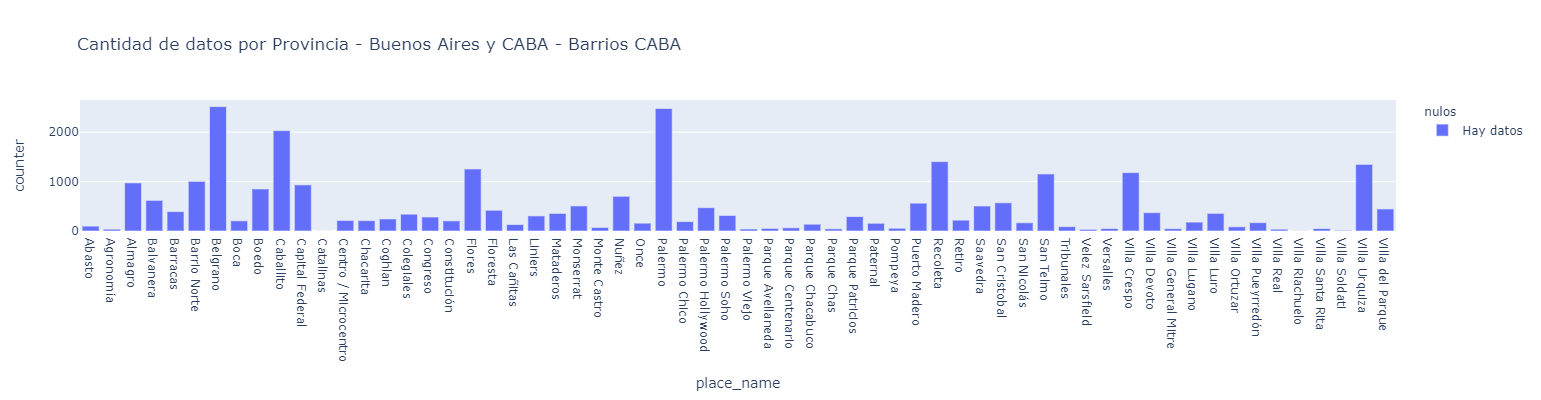

In [310]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_caba_grupo = df_3_caba.groupby(by=['state_name',"place_name",'nulos'],as_index=False)['counter'].sum()
df_3_caba_grupo['nulos'] = df_3_caba_grupo['nulos'].astype(str)
df_3_caba_grupo['nulos'] = df_3_caba_grupo.nulos.str.replace('False','Hay datos')
df_3_caba_grupo['nulos'] = df_3_caba_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_caba_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Barrios CABA")
fig.show()

In [311]:
data_3_group_capital_mean =df_3_caba.groupby(['place_name']).mean().sort_values('new_price_usd_per_m2', ascending=False)
data_3_group_capital_mean

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,counter,surface_total_in_m2_clean,new_price_usd_per_m2,nulos
place_name,,,,,,,,,,,,,,,,,,
Boedo,36008.489412,3436003.0,-34.625443,-58.417325,4.126628e+05,6.286890e+06,3.563088e+05,49.065000,45.986982,10697.513056,12173.159707,4.000000,1.396384,1717.243243,1.0,51.347059,10276.668722,False
San Cristobal,43259.292469,3429153.0,-34.622892,-58.401240,3.866370e+05,6.456385e+06,3.659149e+05,70.118943,65.361511,9952.388570,9272.067081,4.939024,2.153086,2315.184211,1.0,71.399299,8591.907611,False
Puerto Madero,55689.895204,3429760.0,-34.614020,-58.362478,9.143584e+05,1.589730e+07,9.009777e+05,148.979592,137.343811,6029.687303,6534.651880,169.294118,3.020349,8504.101449,1.0,144.722913,6069.922901,False
Palermo Chico,51759.596859,NaN,-34.578633,-58.411180,1.070181e+06,1.888281e+07,1.070181e+06,196.780220,182.271739,4797.326384,5305.291073,6.142857,3.788618,7673.558140,1.0,199.251309,4863.878711,False
Palermo,64310.950767,3430234.0,-34.583158,-58.424782,4.289905e+05,6.031758e+06,3.418492e+05,100.790721,91.285957,3388.451498,5685.839360,11.644951,2.900171,4602.930643,1.0,101.797014,3606.864138,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Constitución,50492.995122,3435257.0,-34.623961,-58.384467,1.933073e+05,2.181913e+06,1.236597e+05,74.161491,70.542289,1794.471533,4107.089525,4.450000,2.188406,1465.681818,1.0,76.804878,1816.503354,False
Mataderos,65250.258427,3430787.0,-34.669064,-58.522211,1.801158e+05,3.178053e+06,1.801158e+05,151.783972,121.380503,1552.250025,2007.635900,4.714286,3.327103,988.743590,1.0,150.609551,1700.004990,False
Villa Real,53966.108108,3427383.0,-34.620126,-58.524726,1.873784e+05,3.306198e+06,1.873784e+05,153.888889,102.945946,1467.577619,2034.242961,NaN,3.294118,3750.000000,1.0,135.405405,1611.421900,False


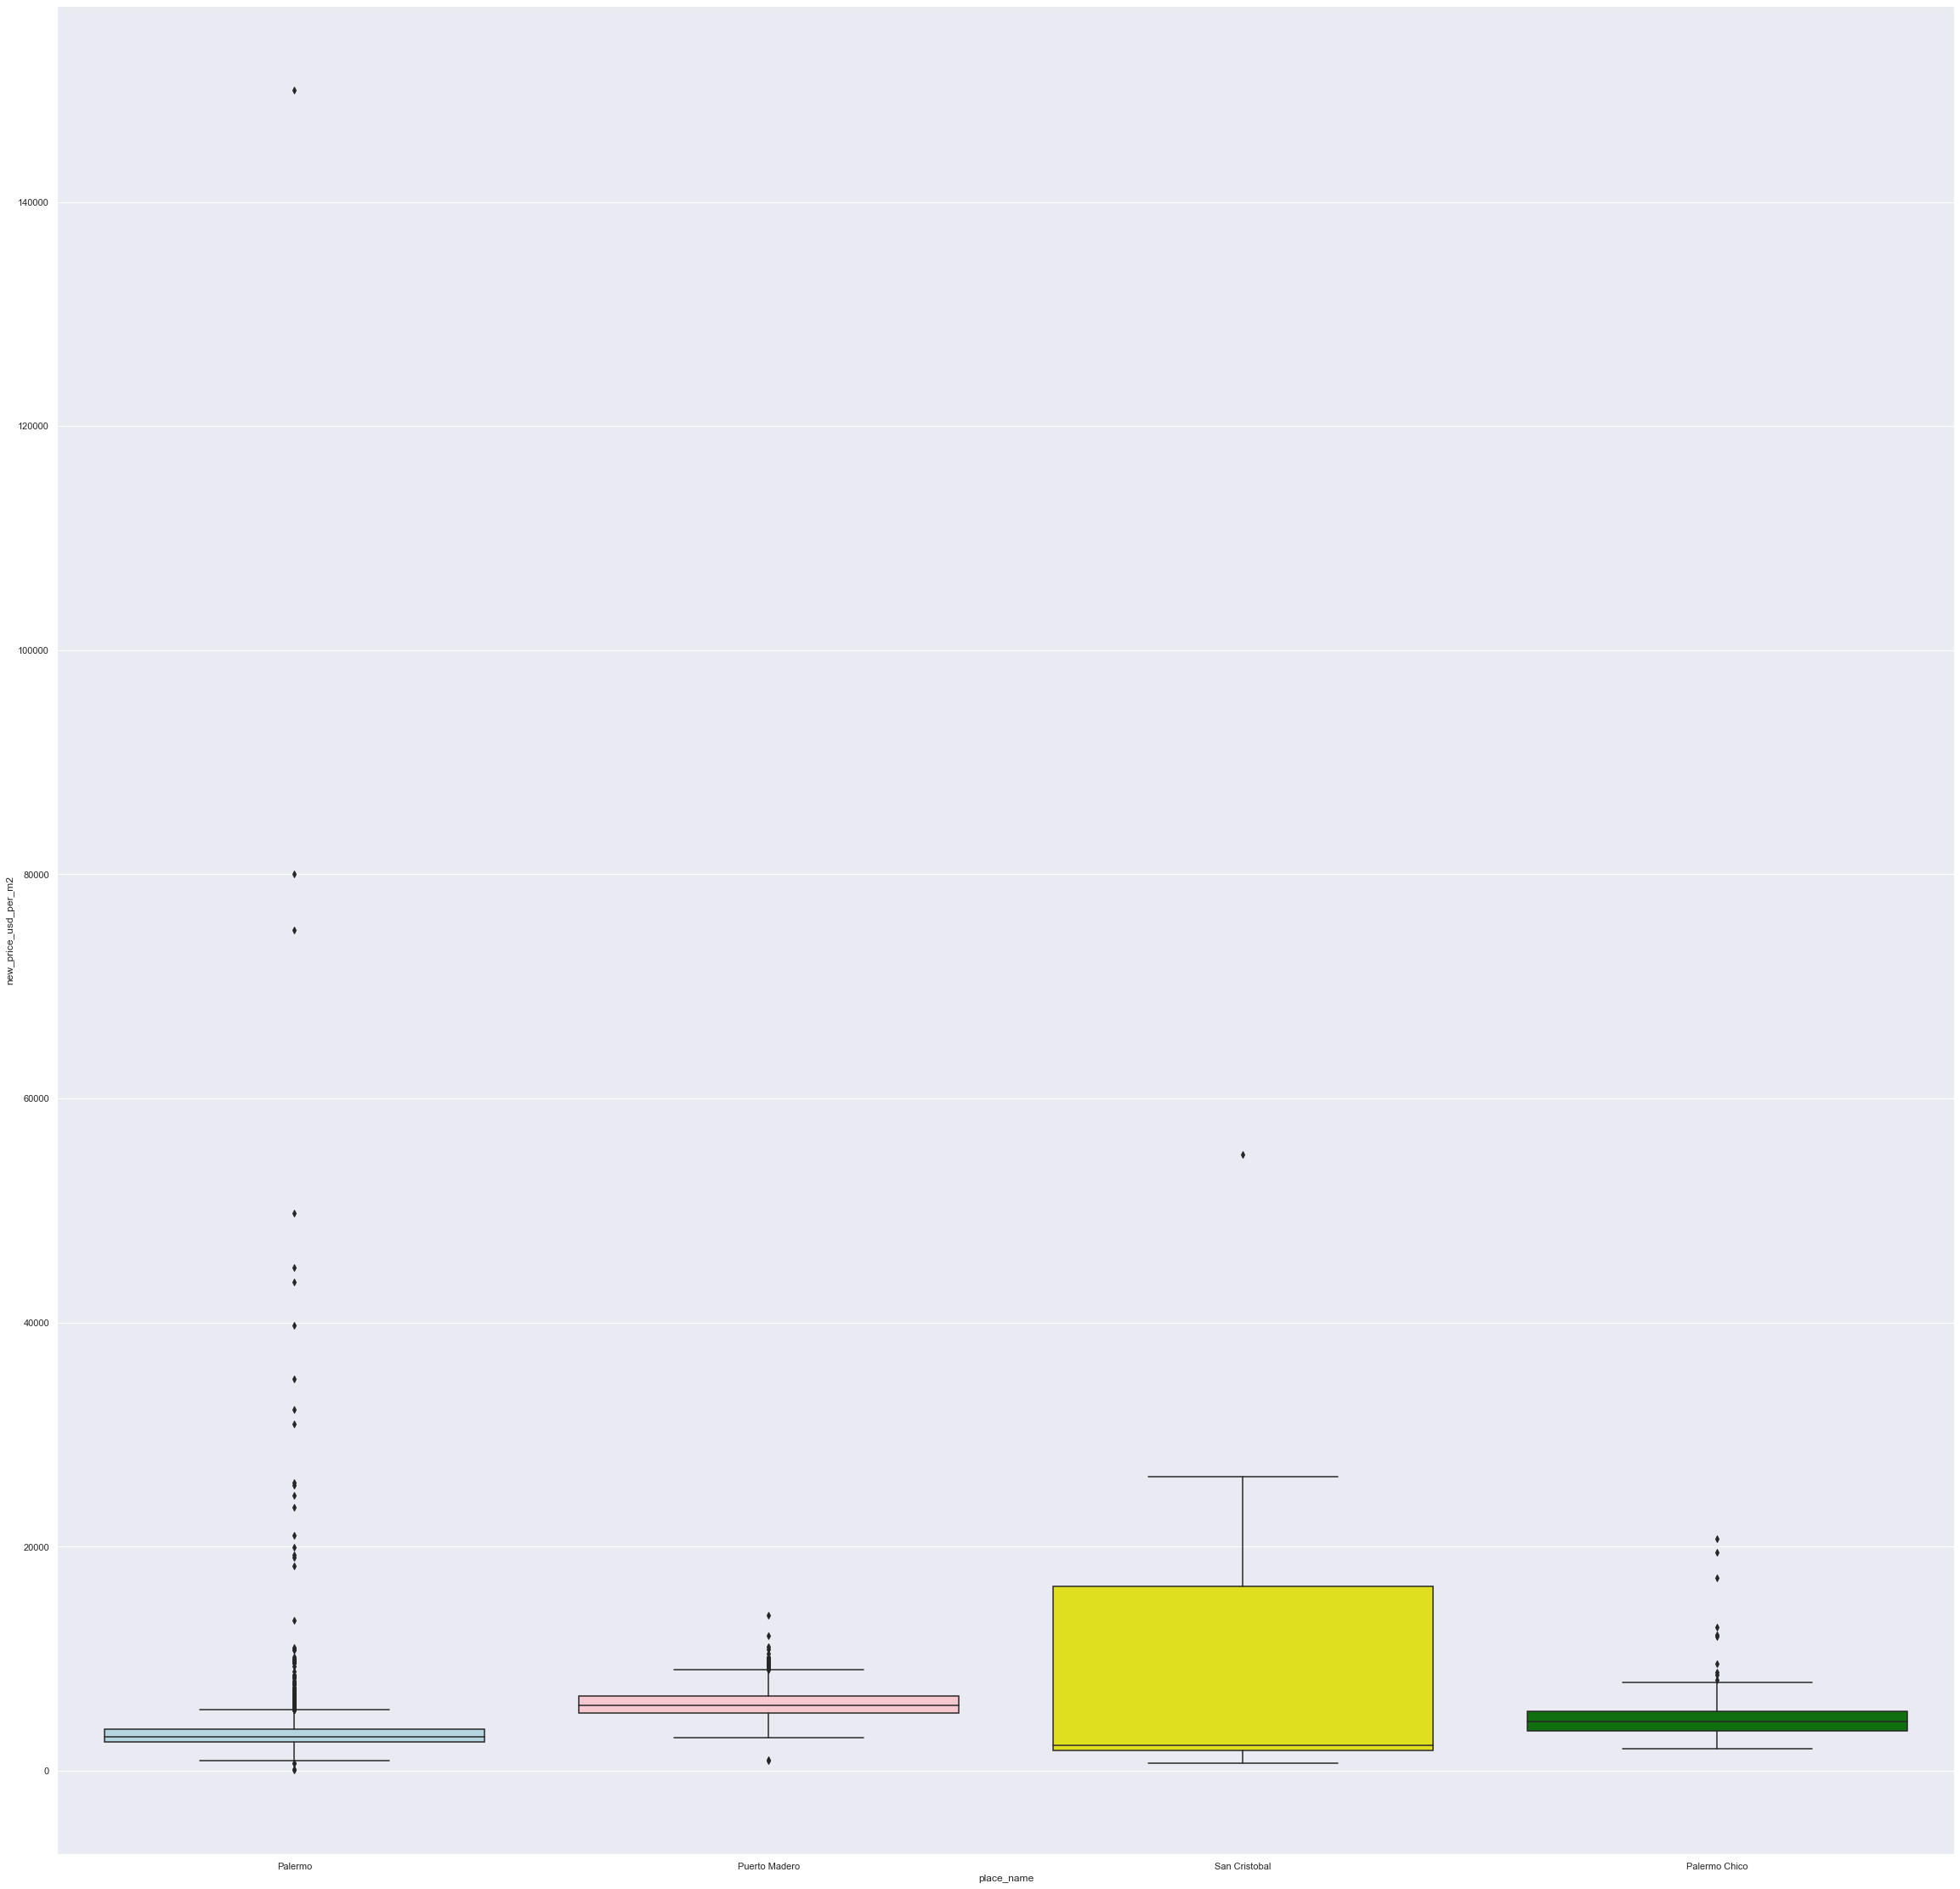

In [312]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Boedo	', 'San Cristobal', 'Puerto Madero', 'Palermo Chico', 'Palermo']
data_suburb_mask = df_3_caba.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_caba.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [313]:
#establecemos que en los menores USD 8500 es donde los datos se encuentran mas concentrados 
df_4_caba = df_3_caba[df_3_caba['new_price_usd_per_m2'] < 8500]
data_4_group_capital_mean =df_4_caba.groupby(['place_name']).mean().sort_values('new_price_usd_per_m2', ascending=False)
data_4_group_capital_mean

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,counter,surface_total_in_m2_clean,new_price_usd_per_m2,nulos
place_name,,,,,,,,,,,,,,,,,,
Puerto Madero,55221.684720,3429760.0,-34.613952,-58.362460,861193.663443,1.493823e+07,846622.411547,147.176600,134.578059,5759.829763,6233.372377,178.312500,2.943750,8287.621212,1.0,143.452611,5764.269298,False
Palermo Chico,52641.252747,NaN,-34.578521,-58.411237,933129.335165,1.646460e+07,933129.335165,193.649425,178.982857,4371.863126,4875.003727,6.142857,3.750000,7673.558140,1.0,196.758242,4438.475568,False
Las Cañitas,38051.480916,NaN,-34.569589,-58.432090,344685.641221,6.081806e+06,344685.641221,102.460938,88.910569,3476.175811,3918.206121,6.000000,2.752137,7513.354839,1.0,101.740458,3501.506406,False
Recoleta,56793.189481,3429595.0,-34.592072,-58.395358,456980.976945,7.163715e+06,406002.724099,126.468591,114.786716,3311.114436,4977.718138,7.956522,3.612827,6010.936782,1.0,124.443804,3293.253713,False
Palermo,64510.040950,3430234.0,-34.583137,-58.424757,409293.090909,5.750221e+06,325893.129595,99.755589,91.284976,3292.080141,5144.609295,11.714754,2.871219,4605.217722,1.0,101.672400,3271.892807,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mataderos,65703.602273,3430787.0,-34.669132,-58.522559,177563.105114,3.133012e+06,177563.105114,152.146853,122.582803,1499.402414,1849.718311,4.714286,3.291262,988.743590,1.0,152.014205,1555.639516,False
Parque Avellaneda,37262.117647,NaN,-34.645490,-58.477192,143105.882353,2.525032e+06,143105.882353,120.161290,95.411765,1384.643386,1636.747360,3.666667,3.255814,1787.500000,1.0,110.549020,1528.486738,False
Pompeya,60373.740000,3430387.0,-34.648844,-58.420426,238872.000000,3.964953e+06,224713.255000,271.354839,306.208333,1084.339734,1839.286393,4.000000,3.758621,2370.333333,1.0,324.420000,1352.250011,False


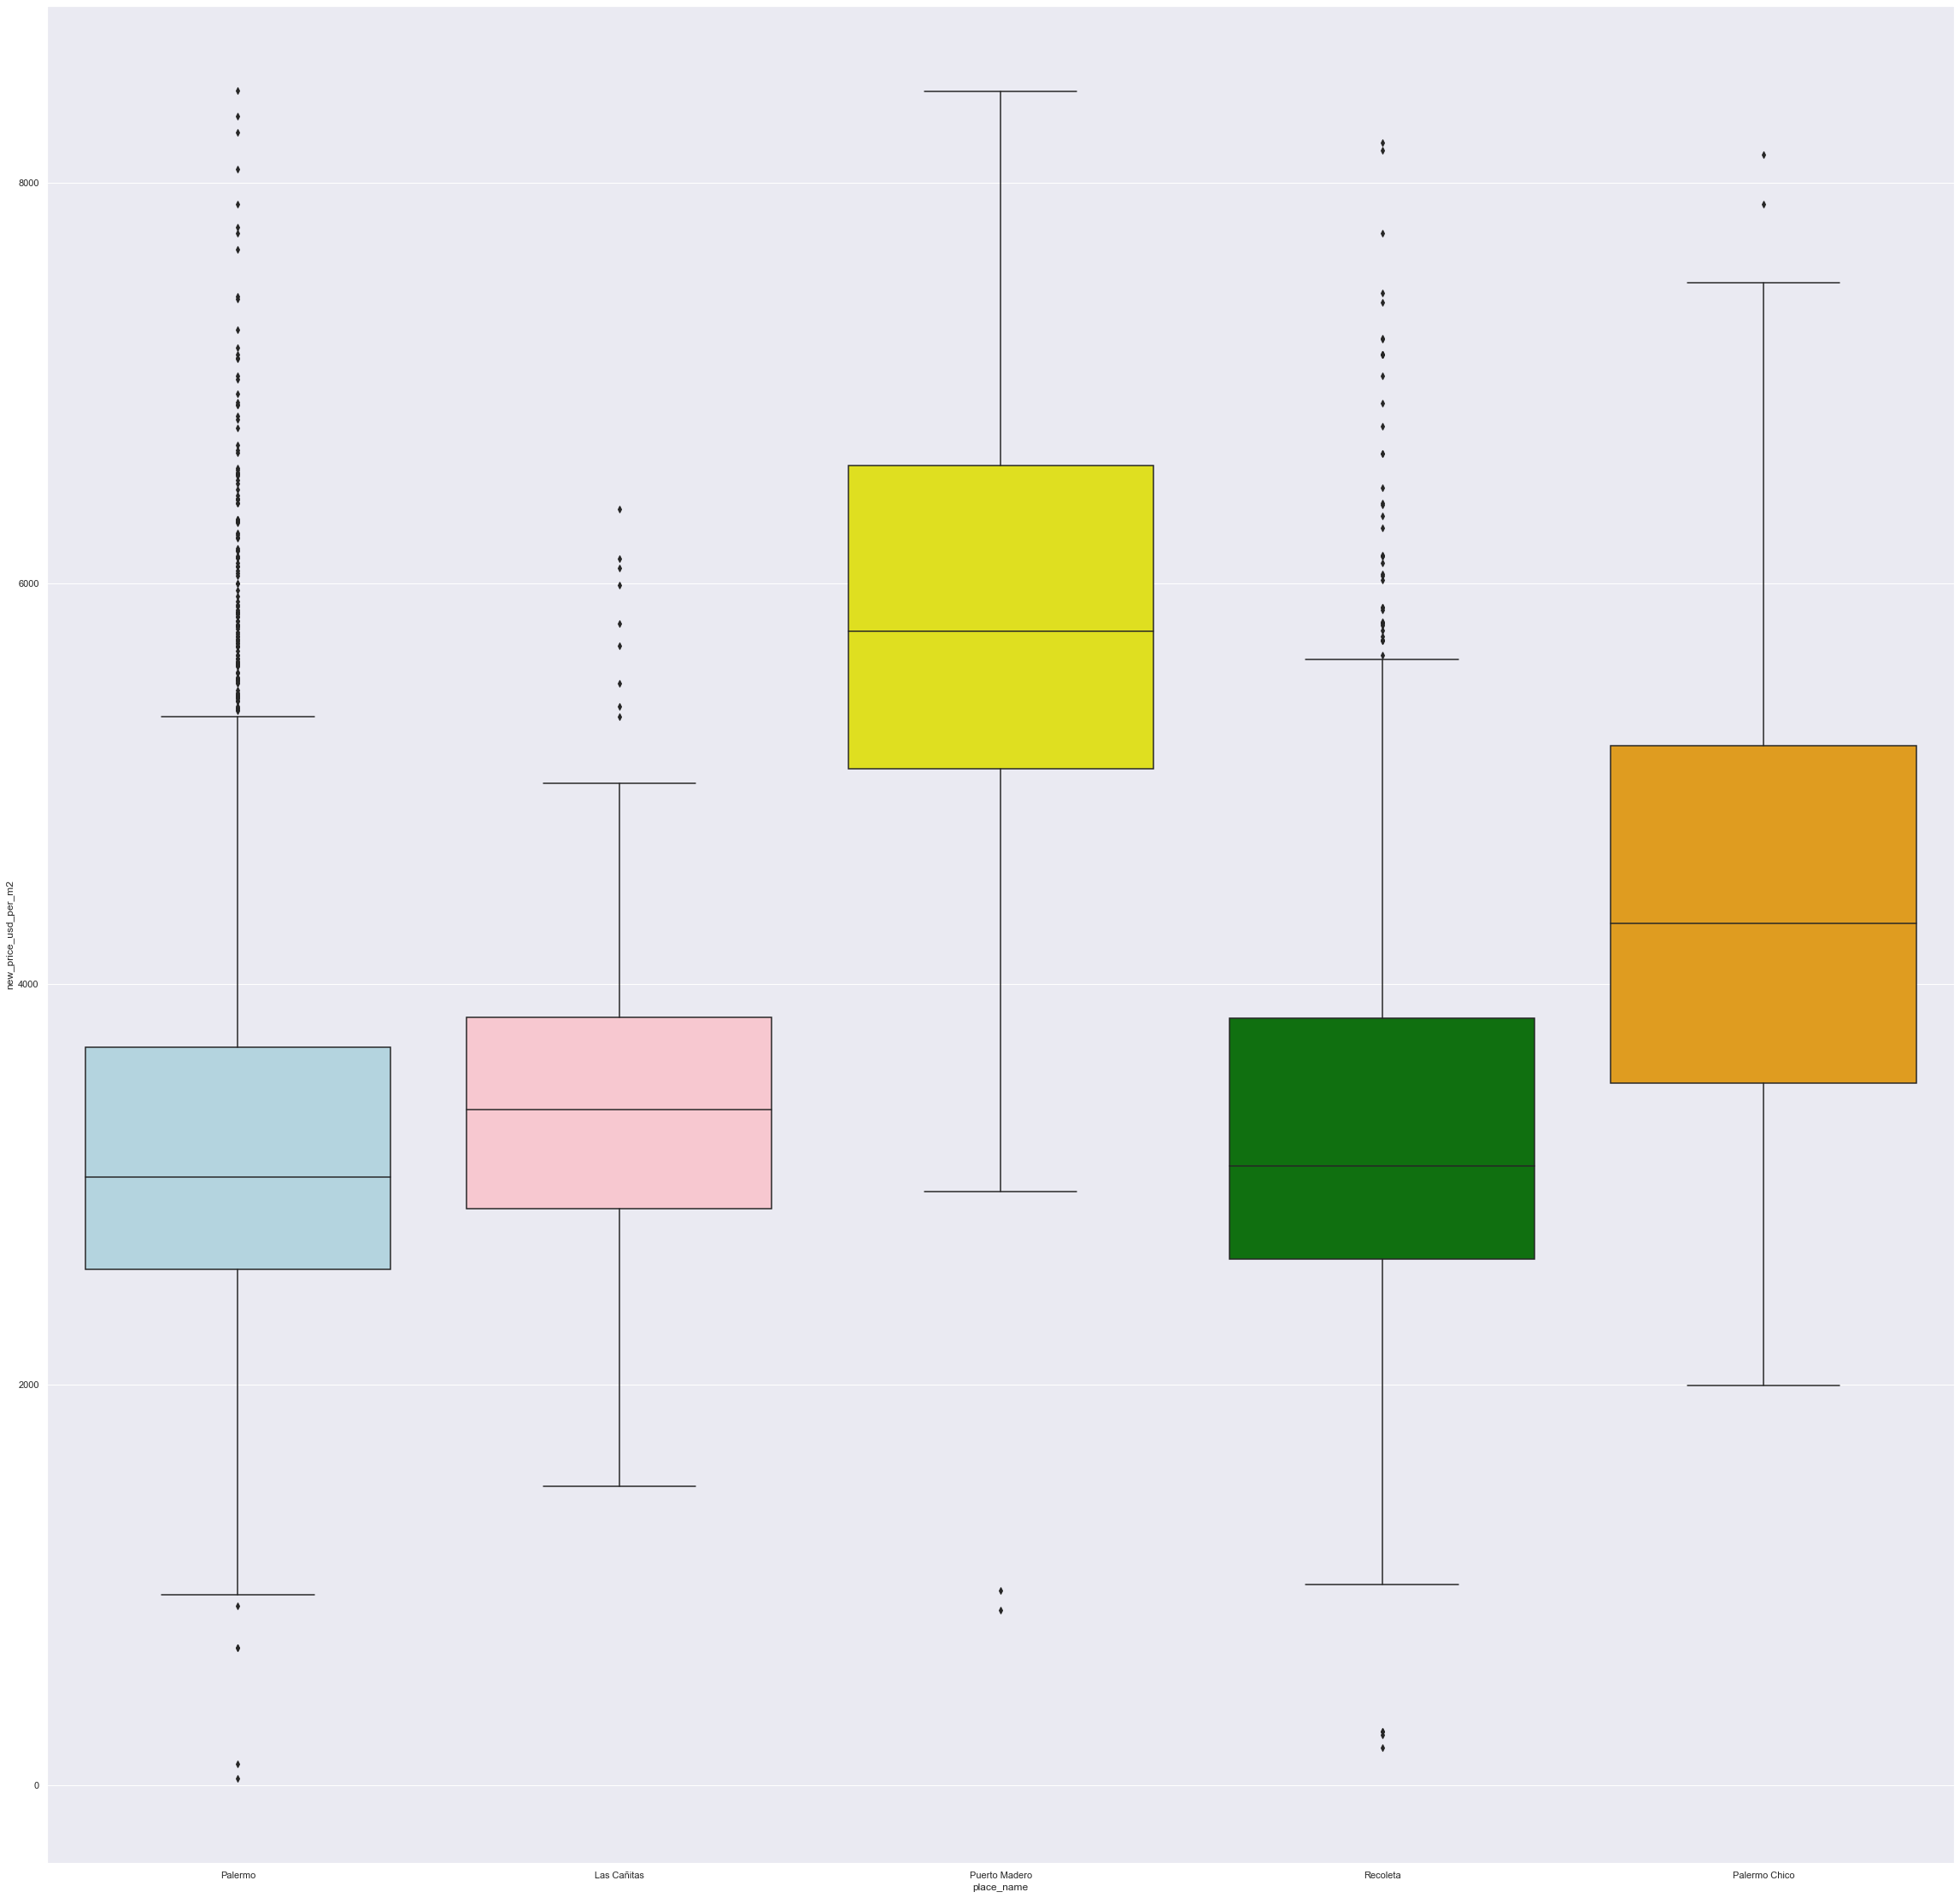

In [314]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Recoleta', 'Las Cañitas', 'Puerto Madero', 'Palermo Chico', 'Palermo']
data_suburb_mask = df_4_caba.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_4_caba.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

# 2. B. Buenos Aires Zona Sur

In [315]:
#Revisamos la mejora de los indicadores estadisticos comparado en la variable original y la nueva
print("limpia",df_3_bsas_sur['new_price_usd_per_m2'].describe(),"original",bsas_sur.price_usd_per_m2.describe())

limpia count     10357.000000
mean       1692.489708
std        2876.155879
min           3.204781
25%        1057.142857
50%        1500.000000
75%        1952.054795
max      224334.704800
Name: new_price_usd_per_m2, dtype: float64 original count     6173.000000
mean      1525.356899
std       1119.507894
min         19.314341
25%        996.015936
50%       1492.063492
75%       1939.393939
max      23140.764706
Name: price_usd_per_m2, dtype: float64


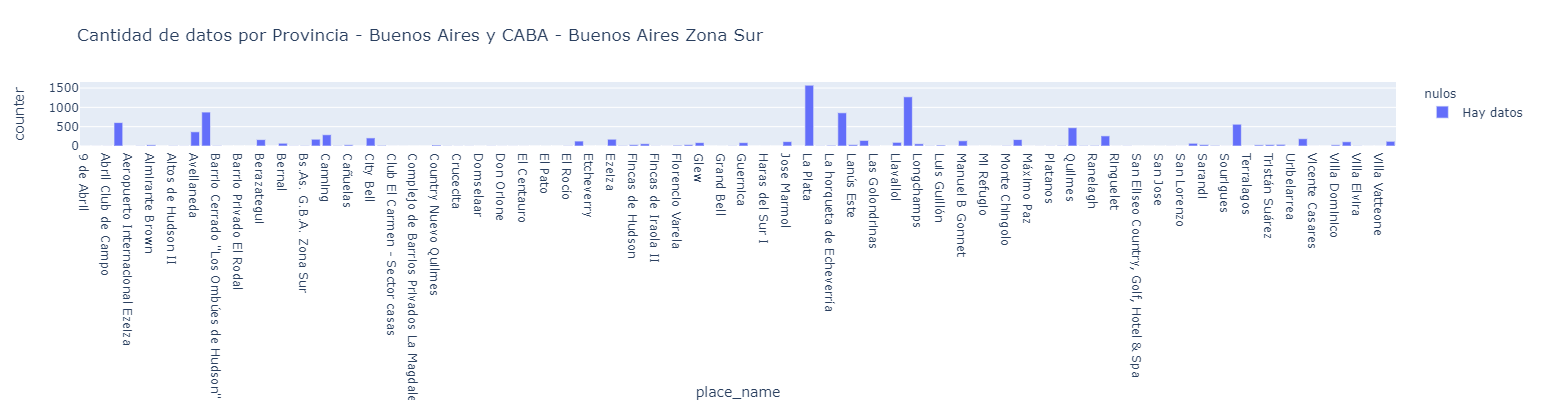

In [317]:
#repetimos el procedimiento realizado de cada en cada gran agrupación pero ahora dentro de cada jurisdiccion
df_3_bsas_sur_grupo = df_3_bsas_sur.groupby(by=['state_name',"place_name",'nulos'],as_index=False)['counter'].sum()
df_3_bsas_sur_grupo['nulos'] = df_3_bsas_sur_grupo['nulos'].astype(str)
df_3_bsas_sur_grupo['nulos'] = df_3_bsas_sur_grupo.nulos.str.replace('False','Hay datos')
df_3_bsas_sur_grupo['nulos'] = df_3_bsas_sur_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(df_3_bsas_sur_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Cantidad de datos por Provincia - Buenos Aires y CABA - Buenos Aires Zona Sur")
fig.show()

In [330]:
#detectamos que la ciudad de la plata esta siendo subdividida en barrios y no puede ser alcanzada correctamente
#Creamos una nueva columna de limpieza de ciudades
df_3['place_name_clean'] = df_3['place_name']

#reemplazamos cada barrio/ciudad dentro de lp 

lp_abasto_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Abasto|"
df_3.loc[lp_abasto_mask, "place_name_clean"] = "La Plata Abasto"

lp_arturosegui_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Arturo Seguí|"
df_3.loc[lp_arturosegui_mask, "place_name_clean"] = "La Plata Arturo Seguí"
#
lp_citybell_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|City Bell|"
df_3.loc[lp_citybell_mask, "place_name_clean"] = "La Plata Arturo City Bell"

lp_etcheve_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Etcheverry|"
df_3.loc[lp_etcheve_mask, "place_name_clean"] = "La Plata Etcheverry"

lp_gorina_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Gorina|"
df_3.loc[lp_gorina_mask, "place_name_clean"] = "La Plata Gorina"

lp_grandbell_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Grand Bell|"
df_3.loc[lp_grandbell_mask, "place_name_clean"] = "La Plata Grand Bell"

lp_haras1_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Haras del Sur I|"
df_3.loc[lp_haras1_mask, "place_name_clean"] = "La Plata Haras del Sur I"

#
lp_jhernandez_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|José Hernández|"
df_3.loc[lp_jhernandez_mask, "place_name_clean"] = "La Plata José Hernández"

lp_lolmos_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Lisandro Olmos|"
df_3.loc[lp_lolmos_mask, "place_name_clean"] = "La Plata Lisandro Olmos"

lp_hornos_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Los Hornos|"
df_3.loc[lp_hornos_mask, "place_name_clean"] = "La Plata Los Hornos"

lp_gonnet_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Manuel B Gonnet|"
df_3.loc[lp_gonnet_mask, "place_name_clean"] = "La Plata Manuel B Gonnet"

lp_mromero_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Melchor Romero|"
df_3.loc[lp_mromero_mask, "place_name_clean"] = "La Plata Melchor Romero"

lp_ringuelet_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Ringuelet|"
df_3.loc[lp_ringuelet_mask, "place_name_clean"] = "La Plata Ringuelet"

lp_scarlos_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|San Carlos|"
df_3.loc[lp_scarlos_mask, "place_name_clean"] = "La Plata San Carlos"
#
lp_slorenzo_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|San Lorenzo|"
df_3.loc[lp_slorenzo_mask, "place_name_clean"] = "La Plata San Lorenzo"

lp_tolosa_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Tolosa|"
df_3.loc[lp_tolosa_mask, "place_name_clean"] = "La Plata Tolosa"

lp_velisa_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Villa Elisa|"
df_3.loc[lp_velisa_mask, "place_name_clean"] = "La Plata Villa Elisa"

lp_velvira_mask = df_3["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Villa Elvira|"
df_3.loc[lp_velvira_mask, "place_name_clean"] = "La Plata Villa Elvira"

#printeamos una prueba
mask_dataclean = df_3['place_name_clean'].astype('str')
prueba_lp = df_3['place_name'] == "Villa Elvira"
df_3[prueba_lp].head(3)

df_3_bsas_sur_clean = df_3.query(' state_name == "Bs.As. G.B.A. Zona Sur"')



C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [332]:
data_3_group_bsas_sur_clean_mean =df_3_bsas_sur_clean.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)
data_3_group_bsas_sur_clean_mean

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,counter,surface_total_in_m2_clean,new_price_usd_per_m2
place_name_clean,,,,,,,,,,,,,,,,,
San Francisco Solano,30372.000000,3429053.0,-34.785224,-58.305372,2.390000e+05,4.217036e+06,239000.000000,300.000000,50.000000,326.666667,10112.500000,NaN,NaN,NaN,1.0,160.000000,9663.333333
Don Bosco,48817.875000,3435024.0,-34.704995,-58.289041,2.936250e+05,5.180866e+06,293625.000000,111.750000,106.375000,1283.800018,9293.361365,1.0,3.428571,400.0,1.0,109.125000,9227.409330
Guillermo Hudson,18064.000000,NaN,-34.762062,-58.179301,8.500000e+04,1.499782e+06,85000.000000,18.000000,18.000000,4722.222222,4722.222222,NaN,NaN,NaN,1.0,18.000000,4722.222222
Llavallol,68193.989474,3431325.0,-34.795358,-58.423697,1.223998e+06,3.907540e+06,221459.399158,492.592593,231.149425,877.185128,47416.049145,NaN,3.333333,655.5,1.0,245.600000,3574.616641
Sarandi,44391.461538,3428050.0,-34.680677,-58.346358,1.244744e+05,2.196288e+06,124474.358974,97.107143,93.333333,1315.060080,3431.792992,13.0,2.969697,1200.0,1.0,110.410256,3323.893253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
La Plata Etcheverry,41152.000000,NaN,-35.025171,-58.078897,8.500000e+04,1.499782e+06,85000.000000,400.000000,90.000000,212.500000,944.444444,NaN,1.000000,NaN,1.0,400.000000,212.500000
Country Golf El Sosiego,11596.000000,NaN,-34.874876,-58.489130,8.000000e+04,1.411560e+06,80000.000000,NaN,390.000000,NaN,205.128205,NaN,5.000000,NaN,1.0,390.000000,205.128205
Complejo de Barrios Privados La Magdalena,17733.000000,NaN,-34.919388,-58.479669,1.950000e+05,3.440678e+06,195000.000000,1000.000000,160.000000,195.000000,1218.750000,NaN,NaN,NaN,1.0,1000.000000,195.000000


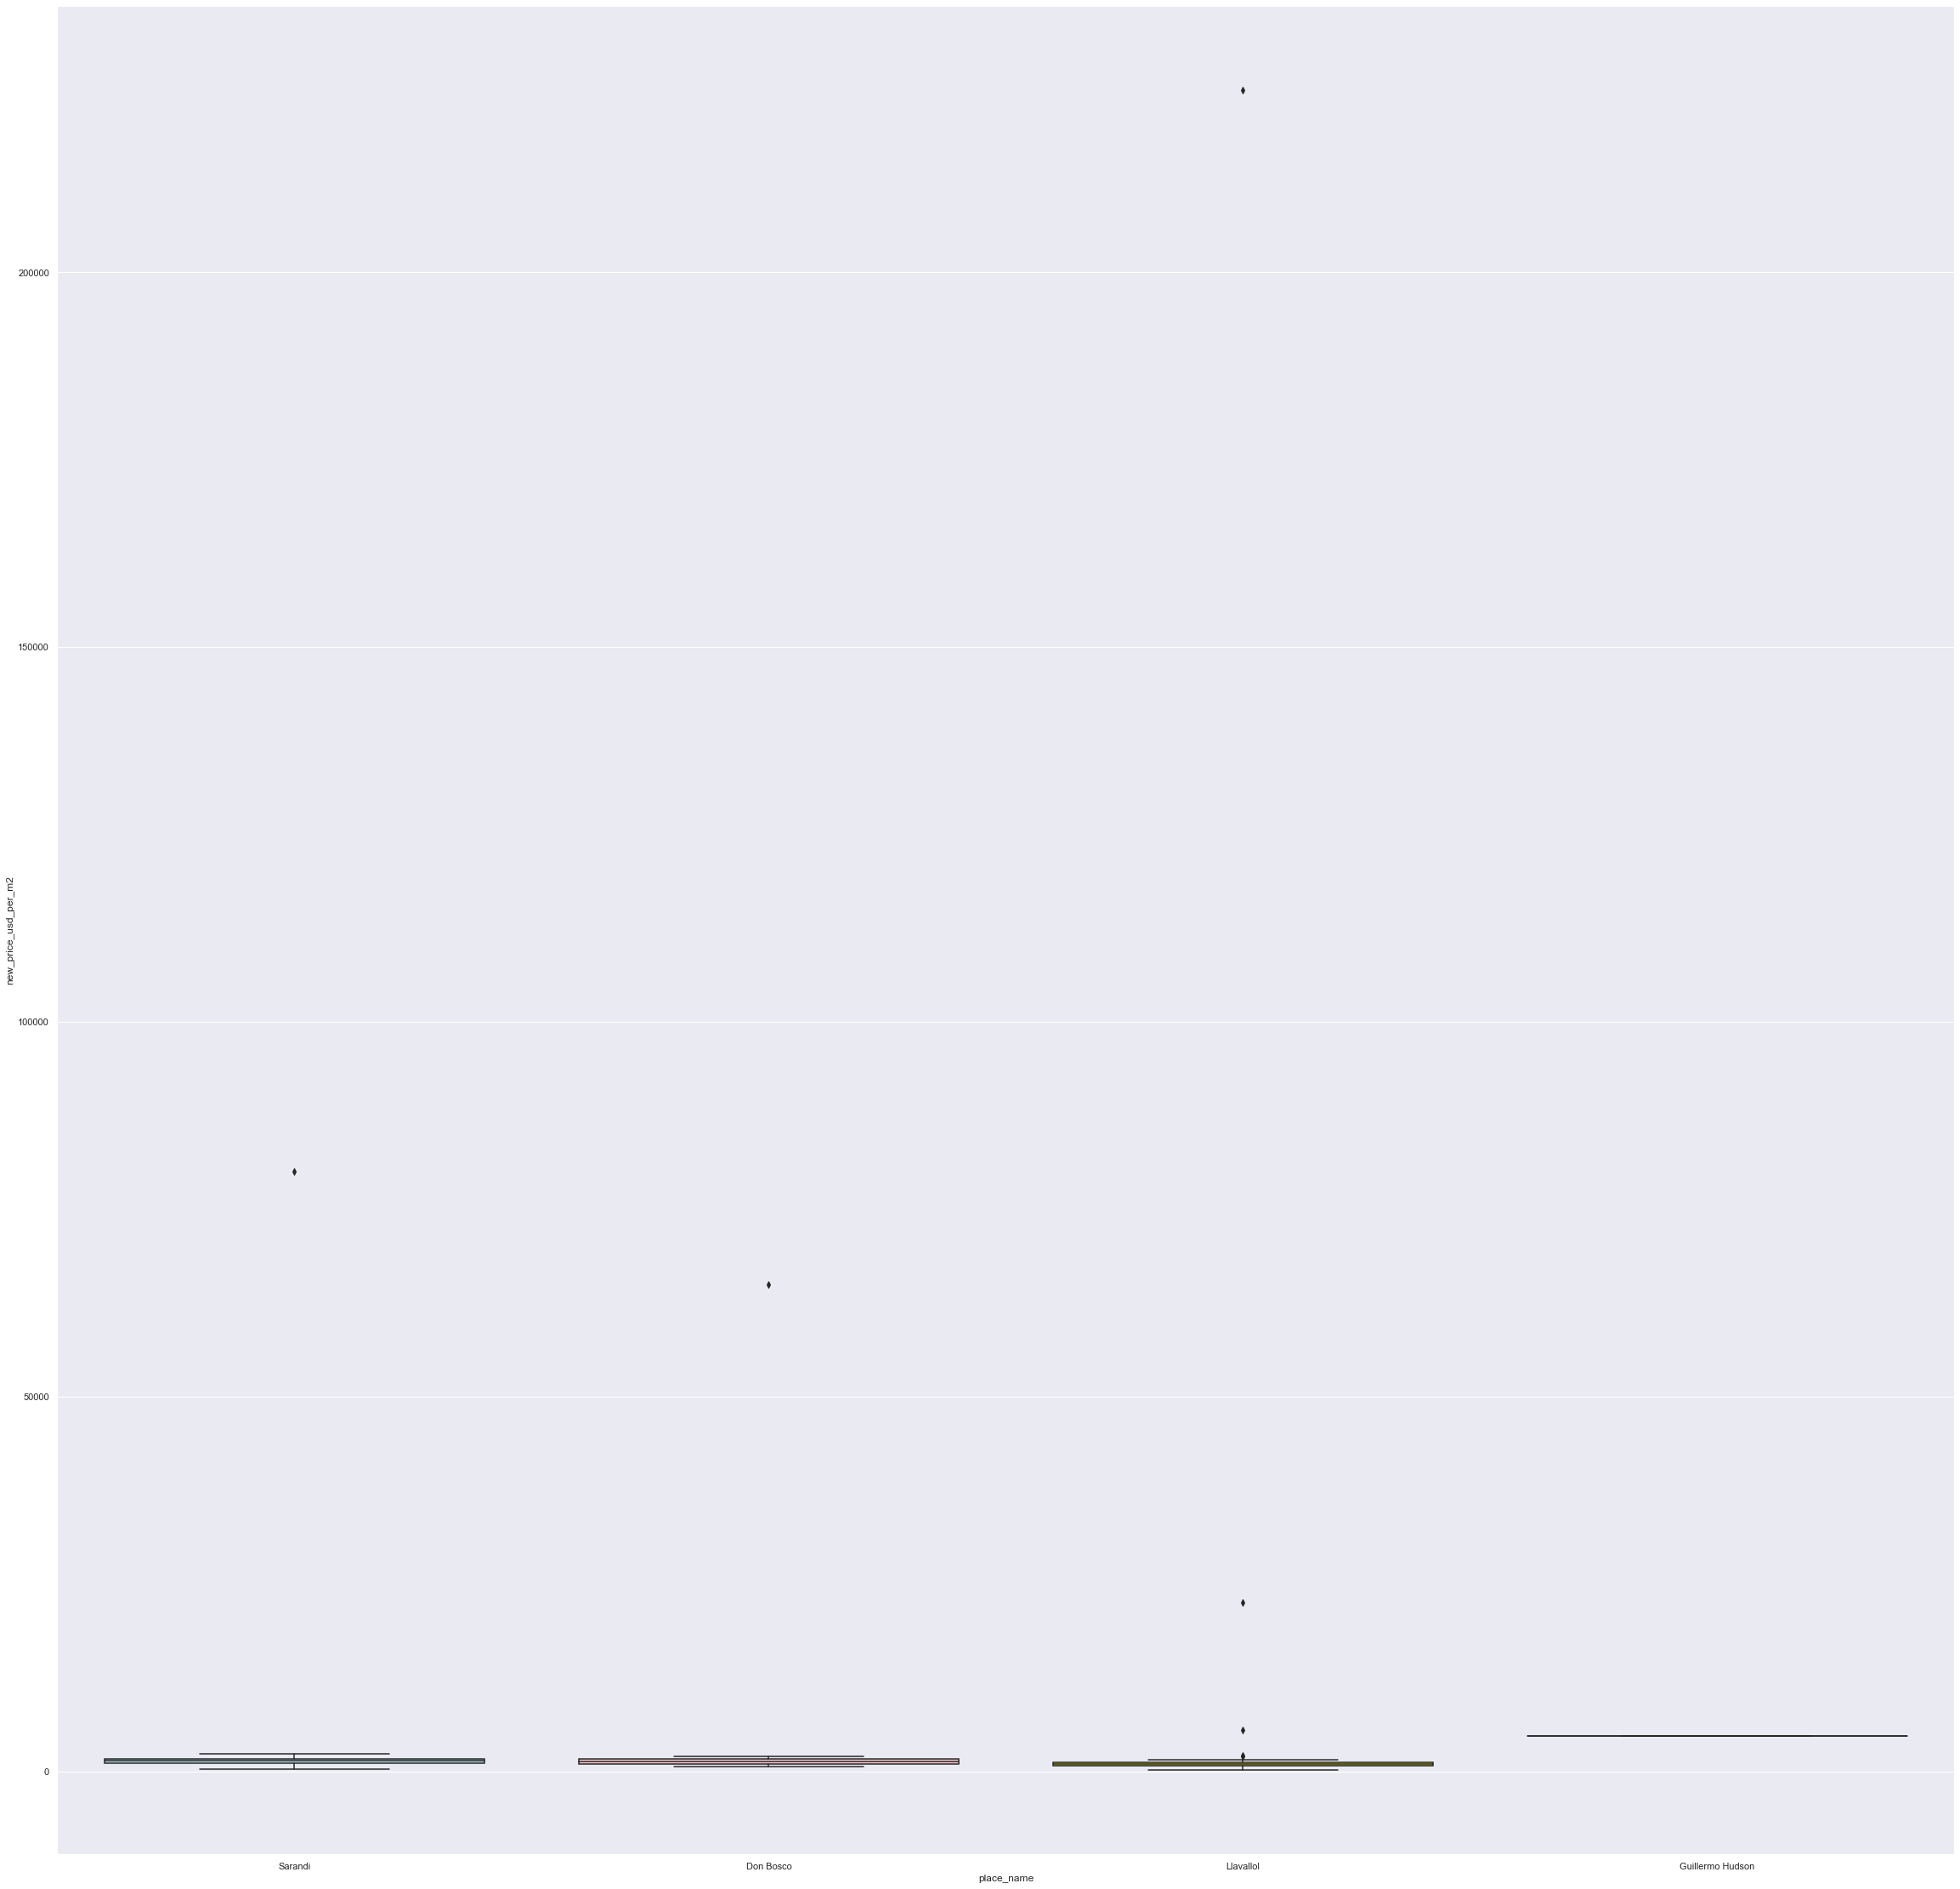

In [333]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['San Francisco Solano	', 'Don Bosco', 'Guillermo Hudson', 'Llavallol', 'Sarandi']
data_suburb_mask = df_3_bsas_sur_clean.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_3_bsas_sur_clean.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [338]:
#establecemos que en los menores USD 8500 es donde los datos se encuentran mas concentrados 
df_4_bsas = df_3_bsas_sur_clean[df_3_bsas_sur_clean['new_price_usd_per_m2'] < 4500]
df_4_bsas_group_mean =df_4_bsas.groupby(['place_name_clean']).mean().sort_values('new_price_usd_per_m2', ascending=False)
df_4_bsas_group_mean

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,counter,surface_total_in_m2_clean,new_price_usd_per_m2
place_name_clean,,,,,,,,,,,,,,,,,
Country Nuevo Quilmes,14163.538462,NaN,-34.696669,-58.287737,394519.230769,6.961095e+06,394519.230769,194.615385,142.720000,2478.292105,3064.905518,NaN,2.944444,NaN,1.0,194.615385,2478.292105
Uribelarrea,44455.000000,3427581.0,-35.095473,-58.914185,130000.000000,2.293785e+06,130000.000000,NaN,61.000000,NaN,2131.147541,NaN,2.000000,NaN,1.0,61.000000,2131.147541
GreenVille Polo & Resort,17760.250000,NaN,-34.801447,-58.157821,375625.000000,6.627715e+06,375625.000000,193.250000,179.875000,2027.358266,2178.044384,NaN,3.000000,NaN,1.0,193.250000,2027.358266
Fincas de Hudson,27933.735294,NaN,-34.817176,-58.162306,325305.970588,5.739861e+06,325305.970588,159.545455,154.617647,1975.547215,2214.988047,NaN,3.421053,4000.0,1.0,165.558824,1996.175624
Fincas de Iraola II,81847.625000,NaN,NaN,NaN,436250.000000,7.697413e+06,436250.000000,NaN,231.375000,NaN,1938.997193,NaN,NaN,5500.0,1.0,231.375000,1938.997193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
La Plata Etcheverry,41152.000000,NaN,-35.025171,-58.078897,85000.000000,1.499782e+06,85000.000000,400.000000,90.000000,212.500000,944.444444,NaN,1.000000,NaN,1.0,400.000000,212.500000
Country Golf El Sosiego,11596.000000,NaN,-34.874876,-58.489130,80000.000000,1.411560e+06,80000.000000,NaN,390.000000,NaN,205.128205,NaN,5.000000,NaN,1.0,390.000000,205.128205
Complejo de Barrios Privados La Magdalena,17733.000000,NaN,-34.919388,-58.479669,195000.000000,3.440678e+06,195000.000000,1000.000000,160.000000,195.000000,1218.750000,NaN,NaN,NaN,1.0,1000.000000,195.000000


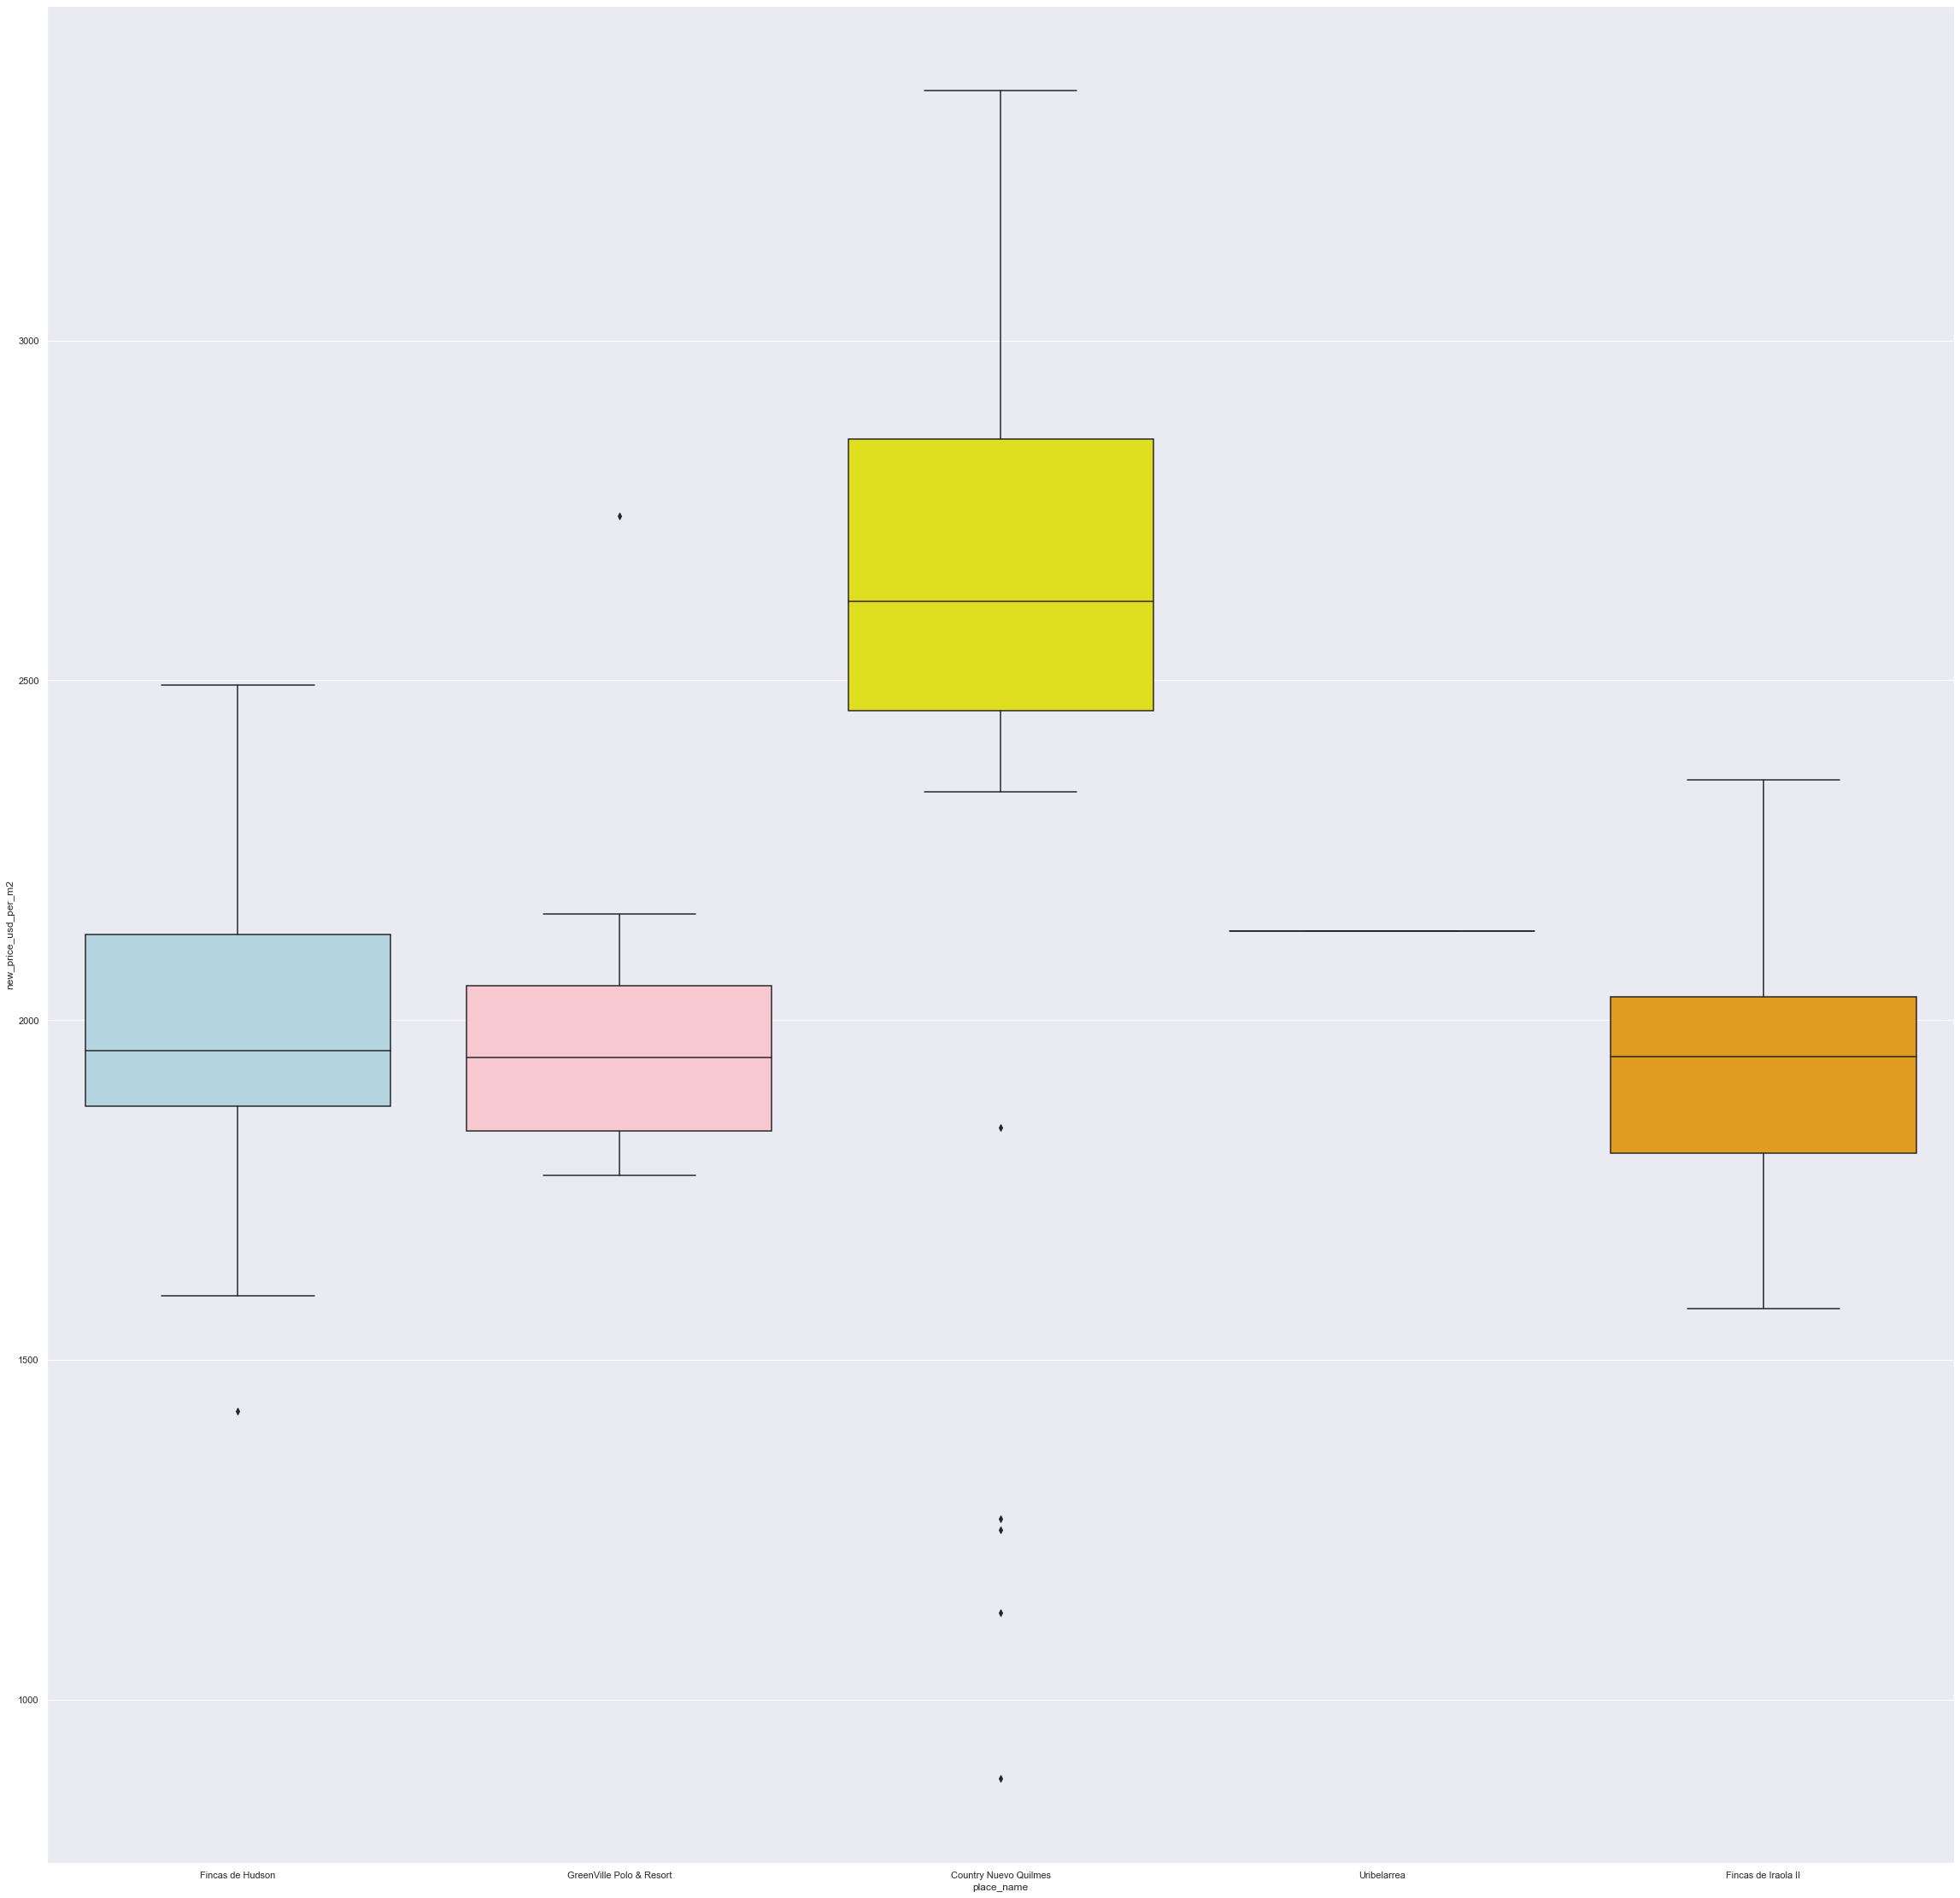

In [339]:
#elegimos las 5 primeras para hacer el grafico de boxplot
suburb_values = ['Country Nuevo Quilmes', 'Uribelarrea', 'GreenVille Polo & Resort', 'Fincas de Hudson', 'Fincas de Iraola II']
data_suburb_mask = df_4_bsas.place_name_clean.apply(lambda x: x in suburb_values)
data_suburb = df_4_bsas.loc[data_suburb_mask, :]
#seleccionamos colores
palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot("place_name", "new_price_usd_per_m2", data=data_suburb, palette = palette_suburb)
#modificacmos tamaño
sns.set(rc={'figure.figsize':(40,40)})

In [ ]:
#Desidir si debemos dropear o estimar con algun indicador estadistico los valores faltantes
#Seleccion de variables que consideramos importantes para la regresión
#Limpiar esas variables. 
#Ver si agregamos los boxplot por cada muestra o grupo, grafico comparativo de datos iniciales y datos analizados